In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load data
df = pd.read_csv("post_pandemic_remote_work_health_impact_2025.csv")

# Data structure and quality check

In [74]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [75]:
df.shape

(3157, 14)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [77]:
df.nunique()

,0
Survey_Date,26
Age,44
Gender,4
Region,6
Industry,9
Job_Role,24
Work_Arrangement,3
Hours_Per_Week,31
Mental_Health_Status,6
Burnout_Level,3


In [78]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [79]:
df.describe(include="object")

,Survey_Date,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
count,3157,3157,3157,3157,3157,3157,2358,3157,2877,3157
unique,26,4,6,9,24,3,6,3,31,5
top,2025-06-07,Male,South America,Professional Services,Research Scientist,Onsite,PTSD,Medium,Shoulder Pain; Eye Strain,$60K-80K
freq,137,1535,575,730,151,1562,423,1366,262,1014


## Check for and remove any duplicate rows in the dataset

In [80]:
# Check for duplicates
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates found: 0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [82]:
# drop survey date
df = df.drop('Survey_Date', axis=1)

## Create Binary Burnout_Level intead of Multiple.

In [83]:
# Create a binary target variable
df['Burnout_Level'] = df['Burnout_Level'].apply(lambda x: "High Burnout" if x == 'High' else "Low Burnout")

# Display the value counts of the new column to verify
print(df['Burnout_Level'].value_counts())

Burnout_Level
Low Burnout     2111
High Burnout    1046
Name: count, dtype: int64


In [84]:
# Calculate the percentage of each target class
target_percentage = df['Burnout_Level'].value_counts(normalize=True) * 100

print("Percentage distribution of Burnout_Level:")
display(target_percentage)

Percentage distribution of Burnout_Level:


,proportion
Burnout_Level,
Low Burnout,66.867279
High Burnout,33.132721


# Initial visualizations (before handling missing data)

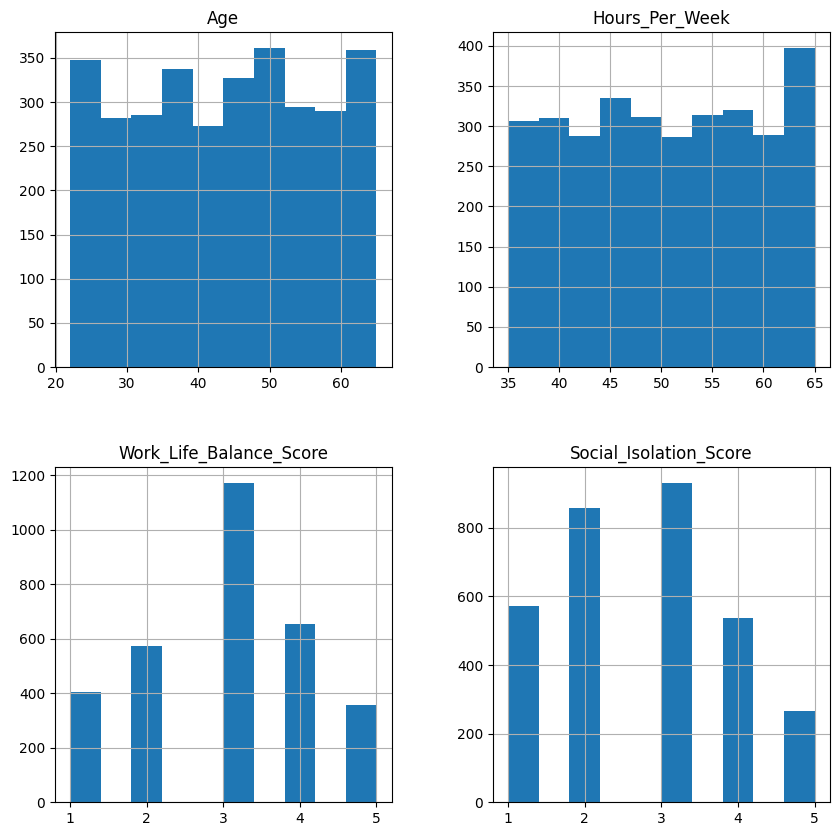

In [85]:
# Generate histograms for all numerical columns
df.hist(figsize=(10, 10))
plt.show()

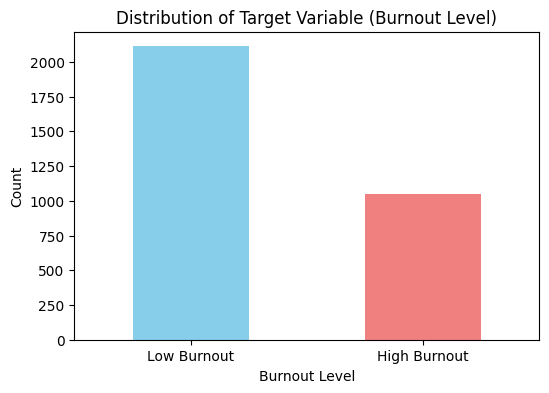

In [86]:
# Create a bar chart for the target variable "Burnout_Level"

plt.figure(figsize=(6, 4))
df['Burnout_Level'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Target Variable (Burnout Level)')
plt.xlabel('Burnout Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Histograms for all numerical columns to visualize their distributions

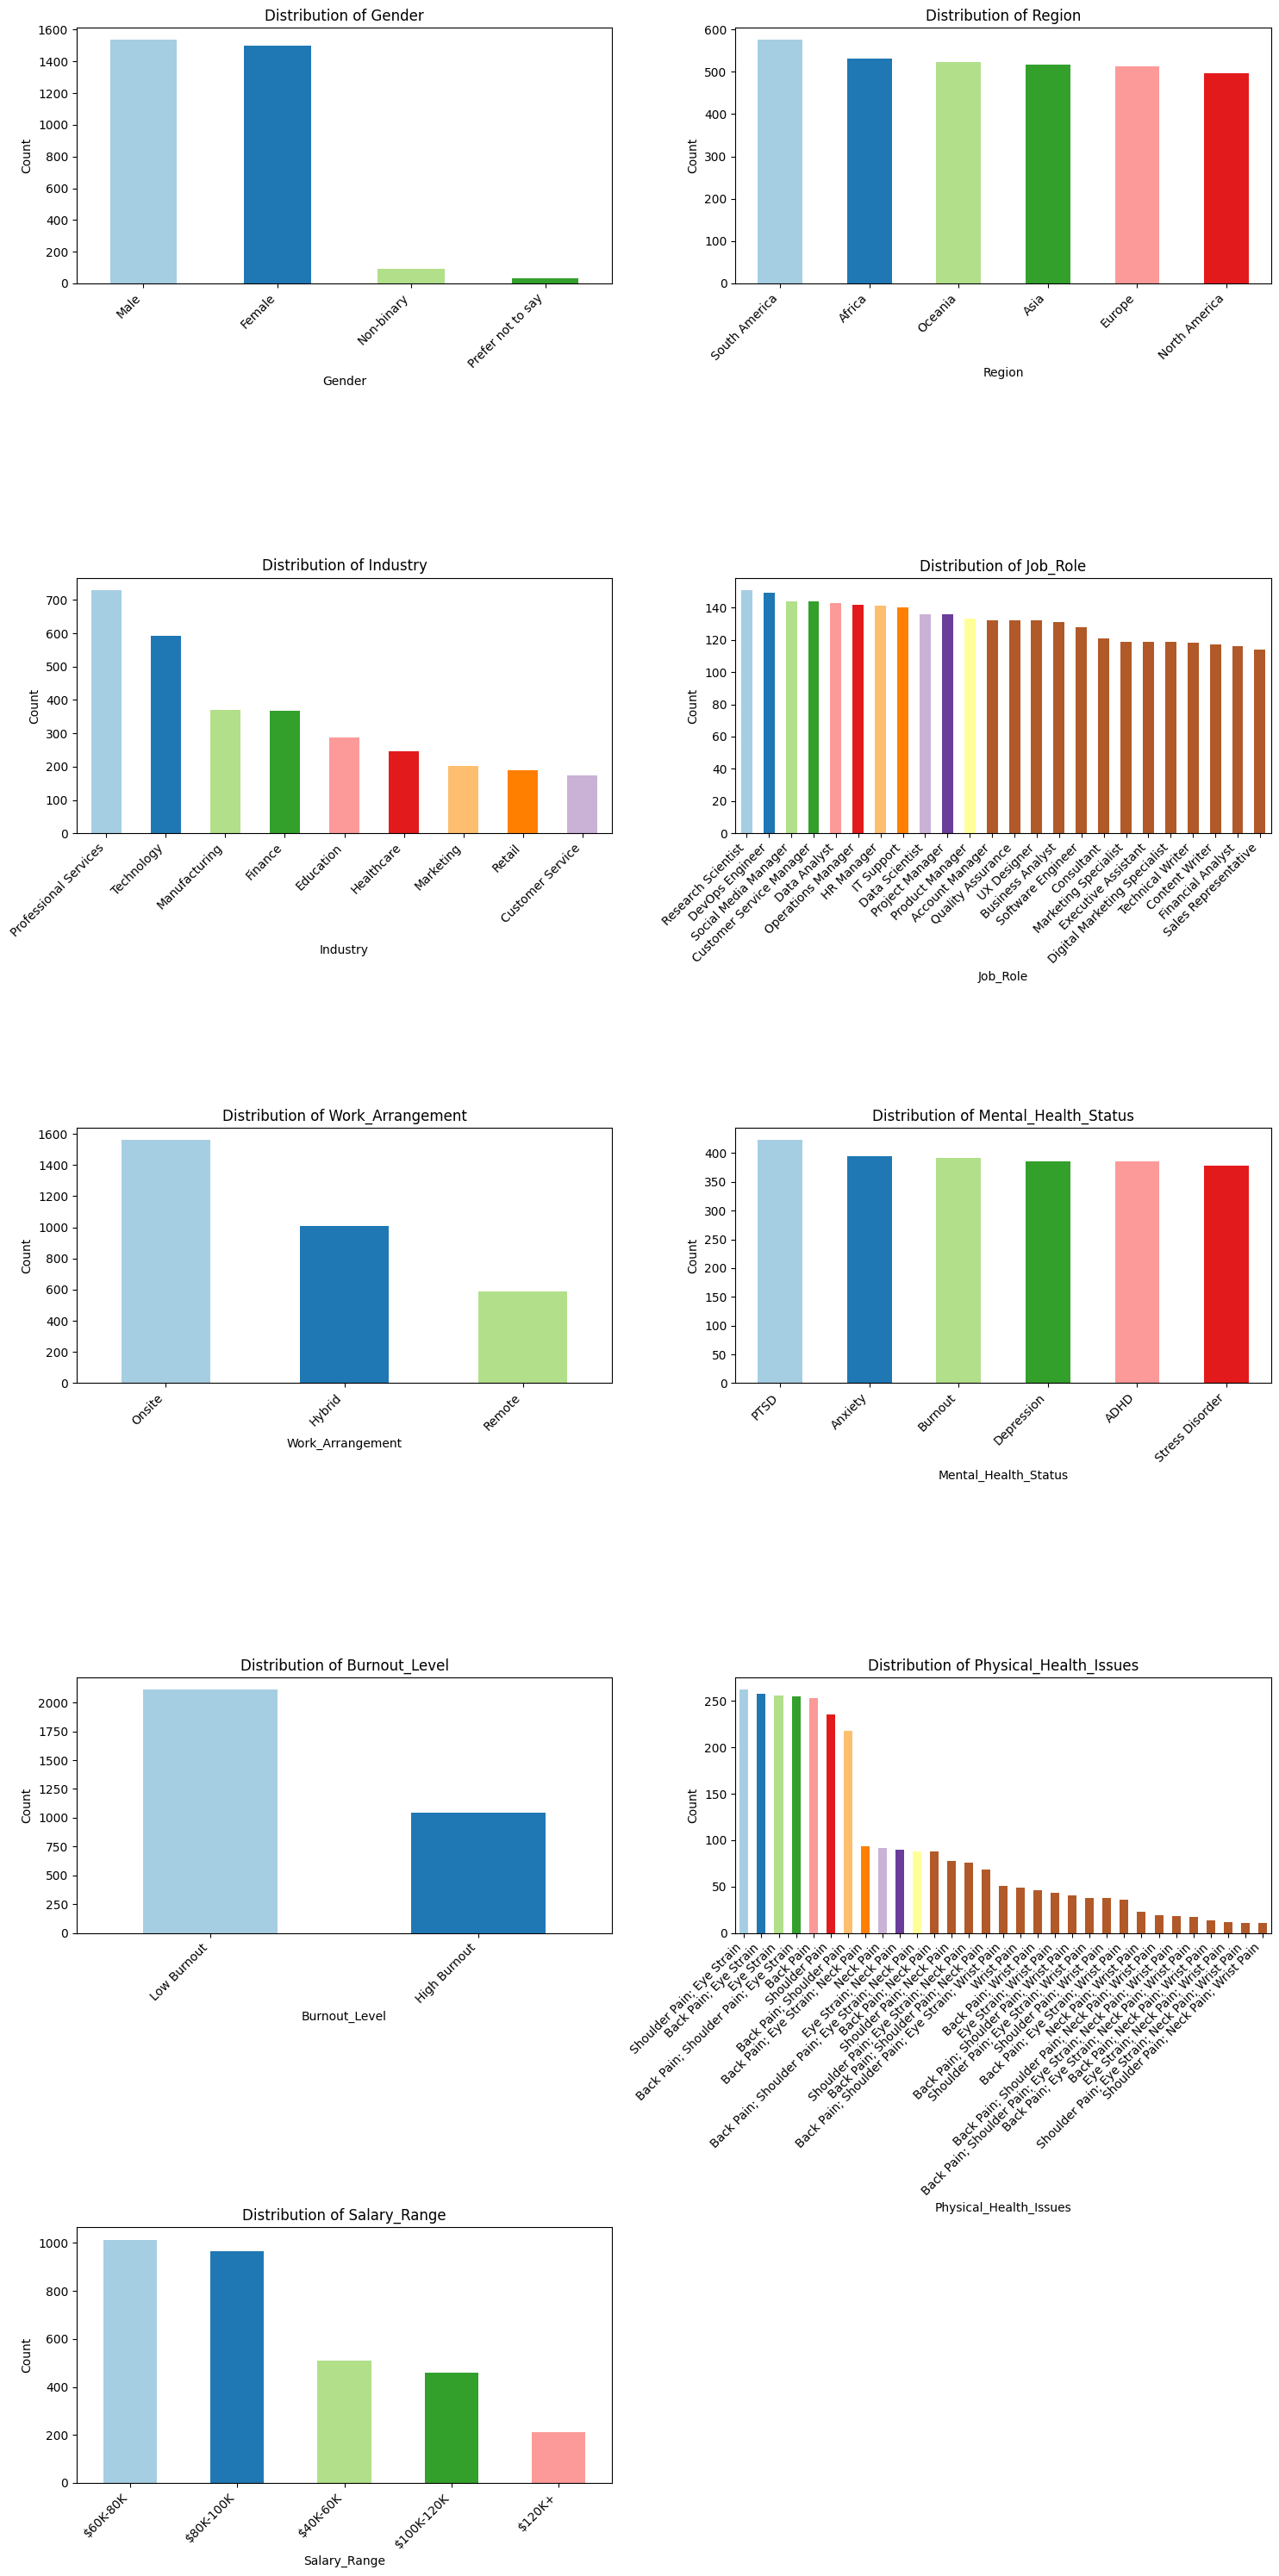

In [87]:
# Create bar charts for key categorical variables
categorical_cols_for_bar = df.select_dtypes(include='object').columns



num_cols_bar = len(categorical_cols_for_bar)
n_rows_bar = (num_cols_bar + 1) // 2 # Arrange in 2 columns
plt.figure(figsize=(15, n_rows_bar * 6))
for i, col in enumerate(categorical_cols_for_bar):
    plt.subplot(n_rows_bar, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color=plt.cm.Paired(np.arange(len(df[col].unique()))))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Histogram of each Feature against Target (Burnout_Level)

Numerical columns: Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score'],
      dtype='object')
Categorical columns: Index(['Gender', 'Region', 'Industry', 'Job_Role', 'Work_Arrangement',
       'Mental_Health_Status', 'Burnout_Level', 'Physical_Health_Issues',
       'Salary_Range'],
      dtype='object')


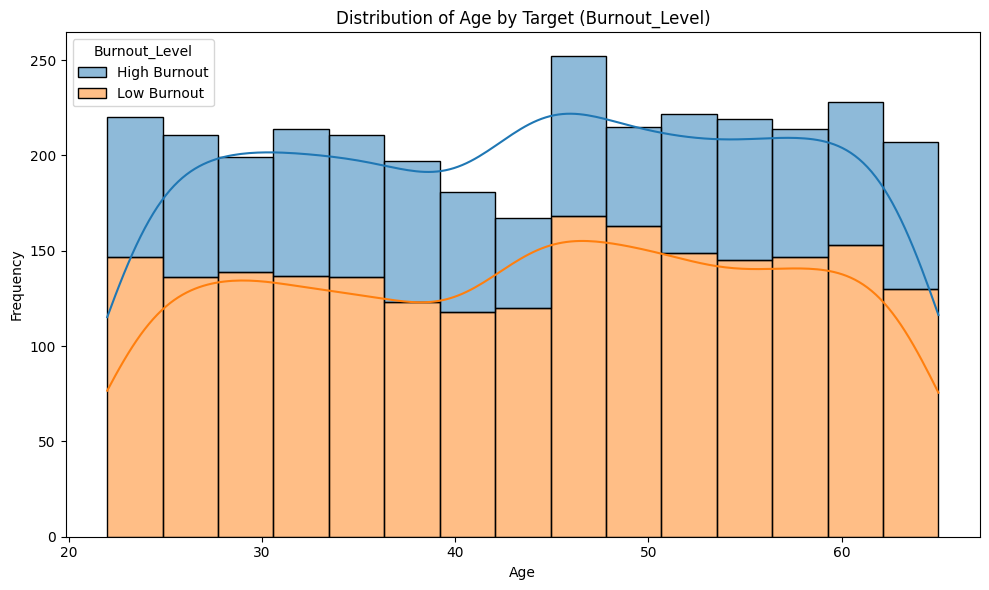

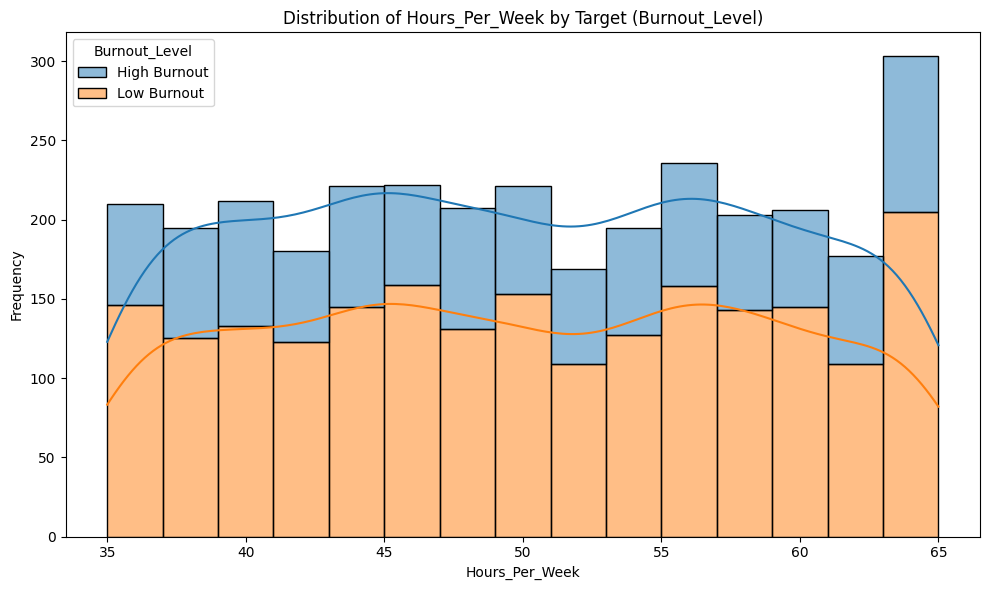

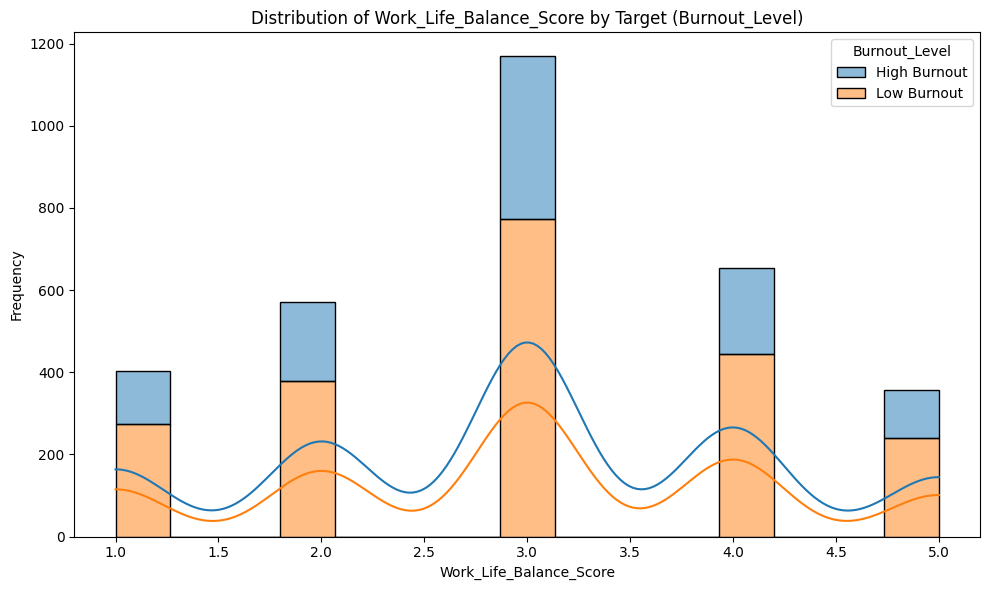

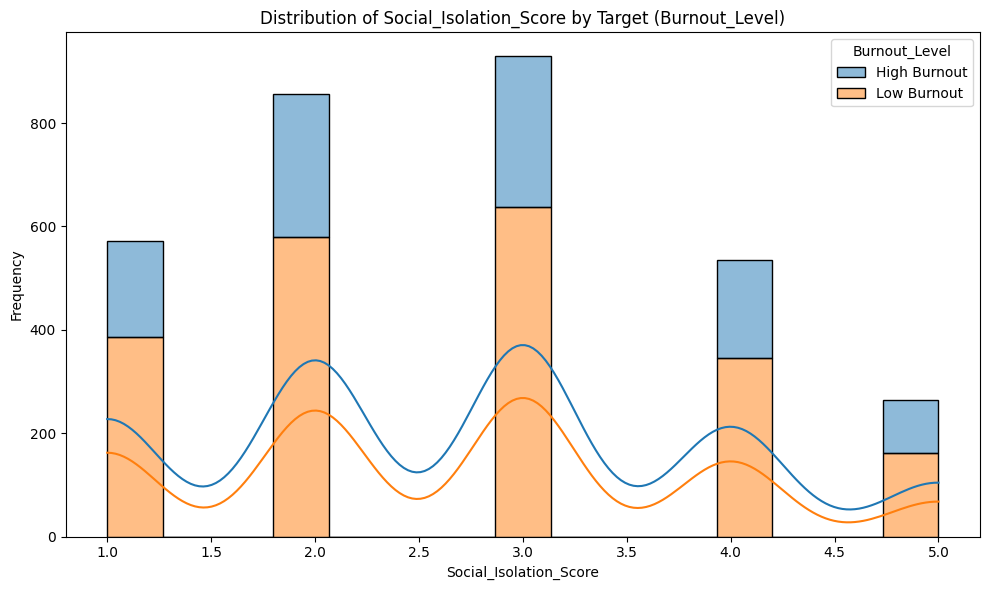

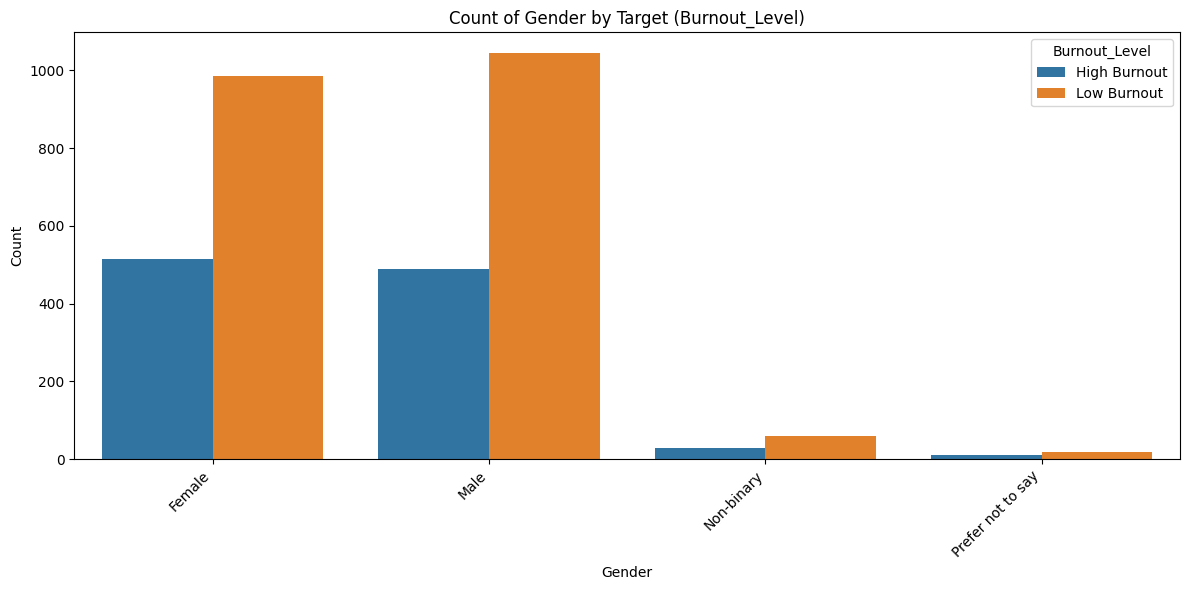

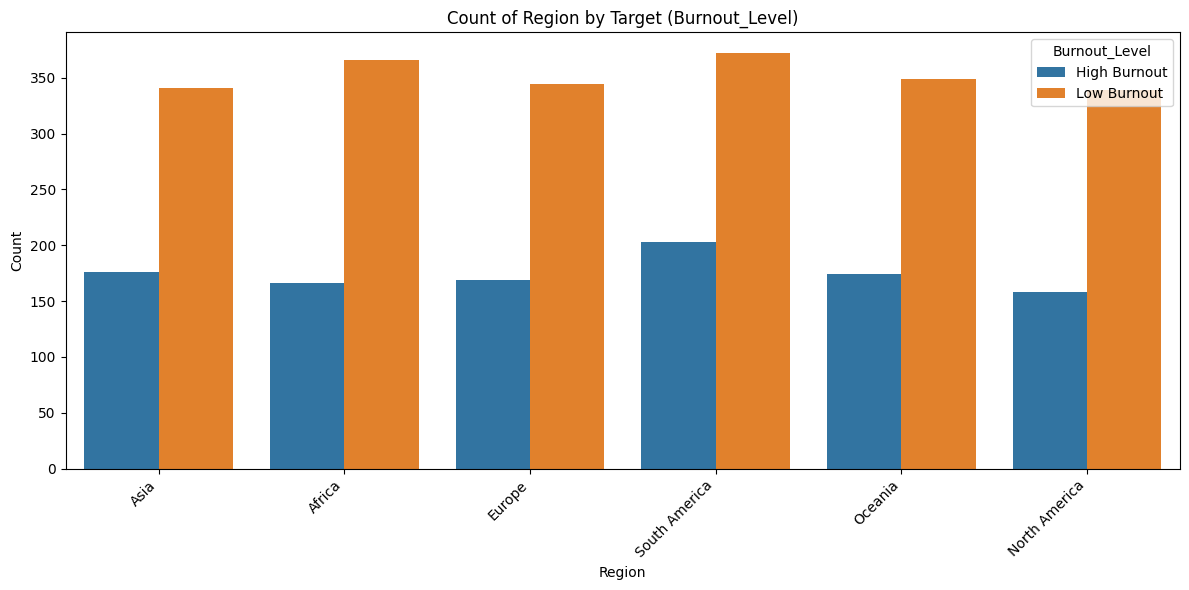

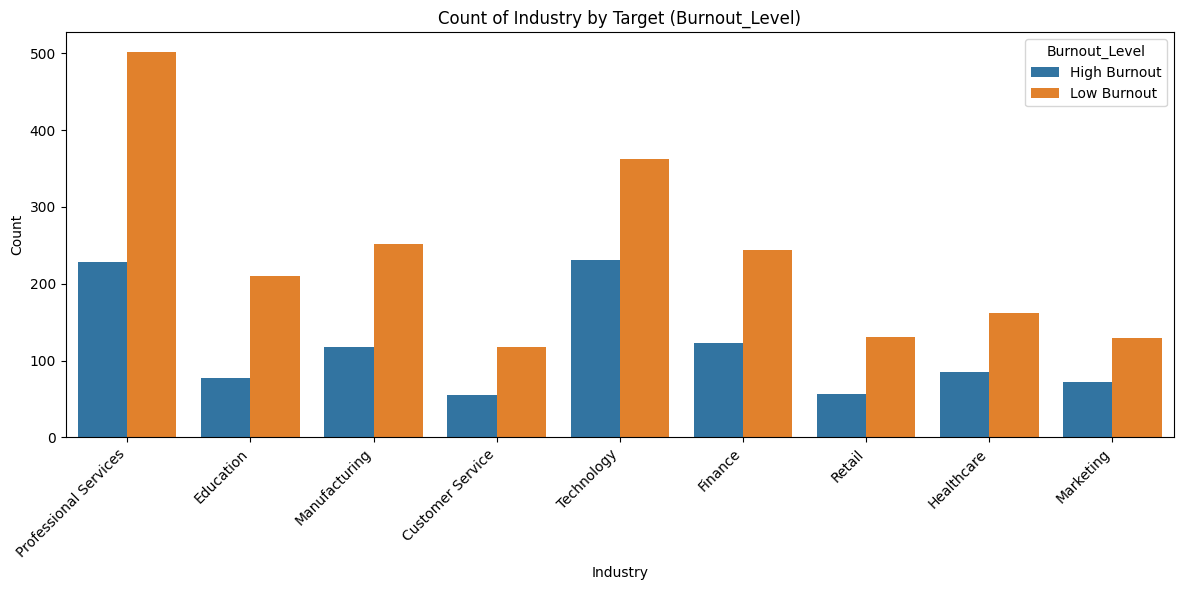

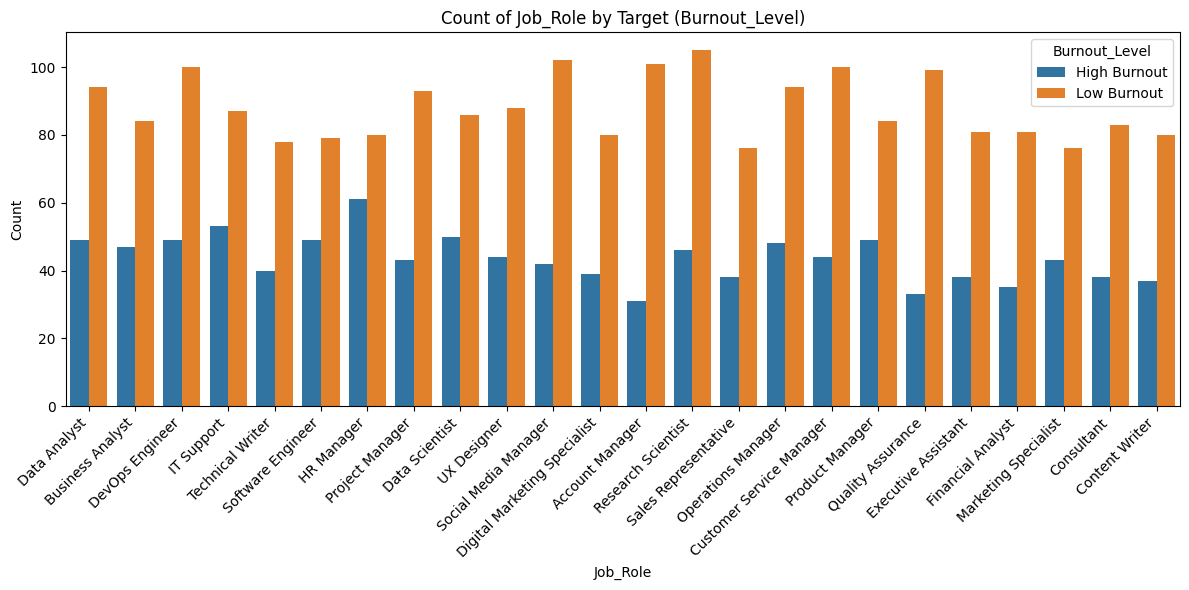

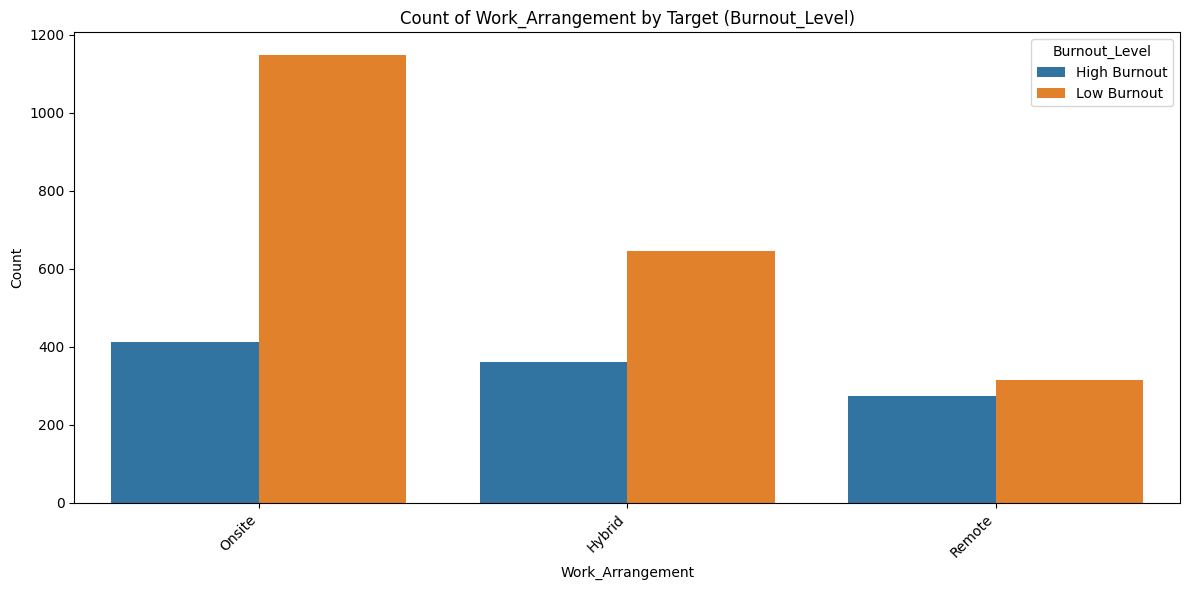

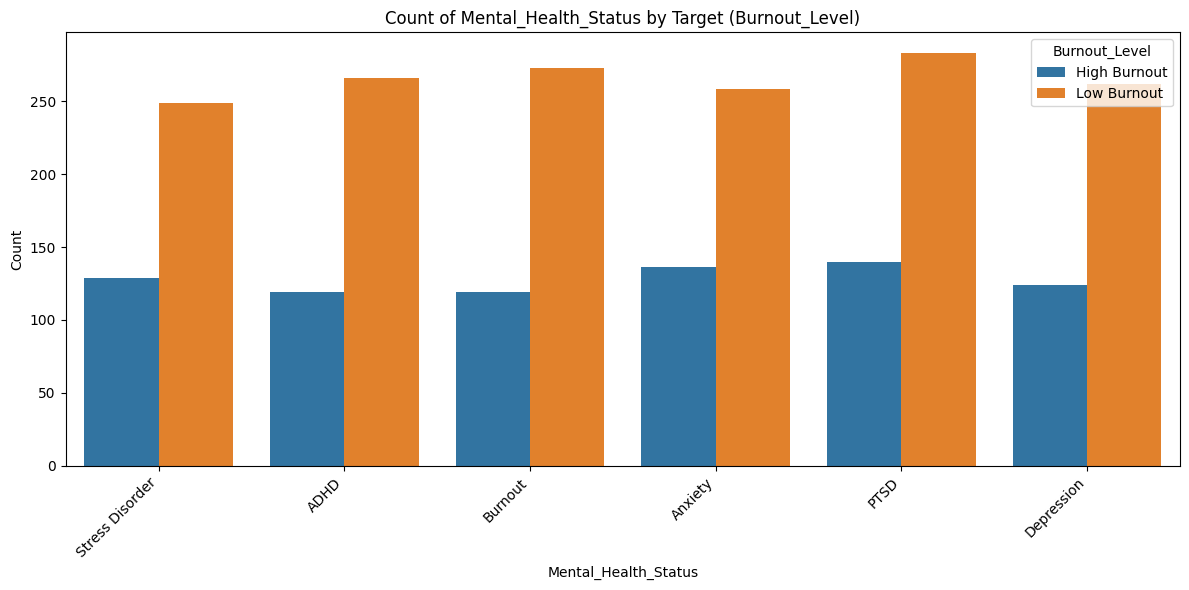

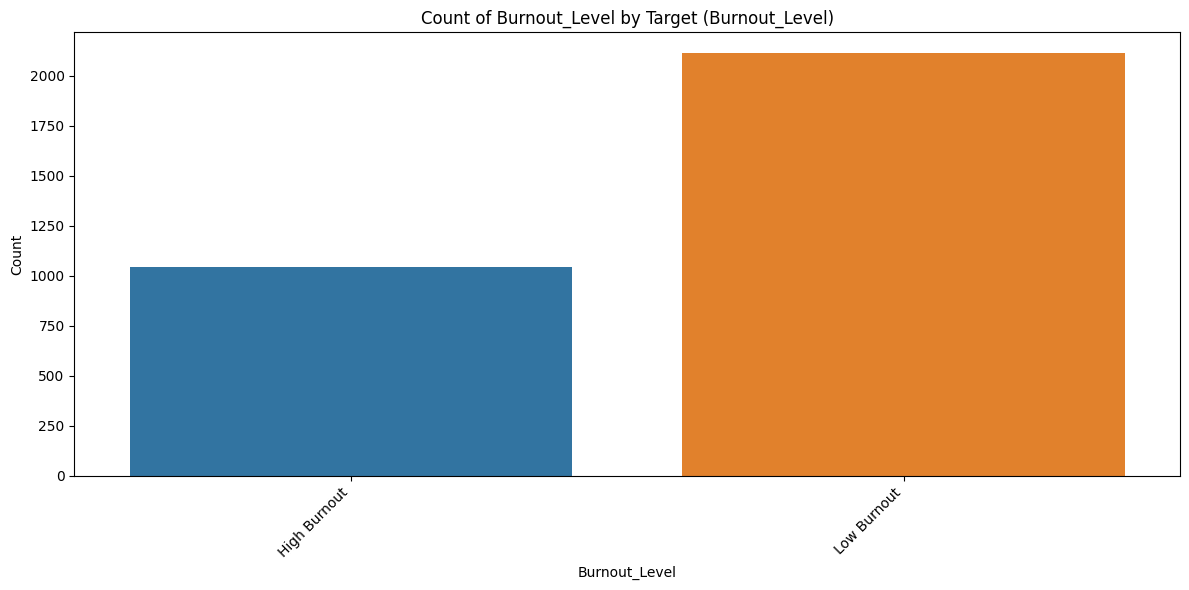

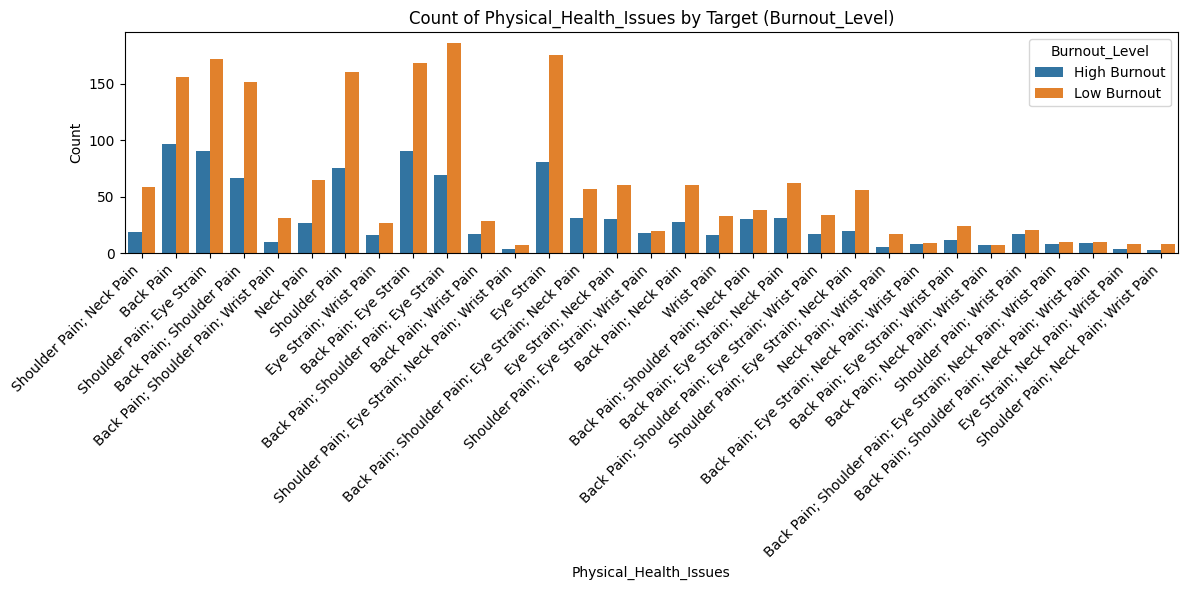

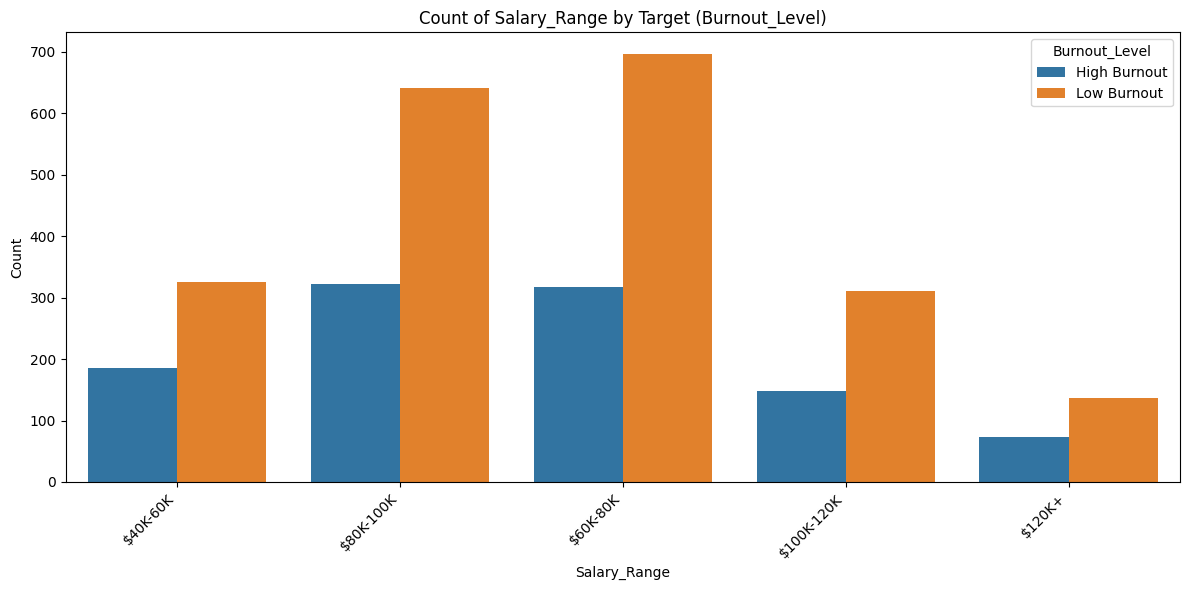

In [88]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Burnout_Level', multiple='stack', kde=True)
    plt.title(f'Distribution of {col} by Target (Burnout_Level)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout() # Added tight_layout for better spacing
    plt.show()



for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='Burnout_Level')
    plt.title(f'Count of {col} by Target (Burnout_Level)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **3. Missing Values**

In [89]:
# Missing values table
missing = df.isnull().sum()
print("Missing values per column:\n", missing)
df_tree = df.copy()

Missing values per column:
 Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64


In [90]:
# Impute median for numeric, mode for categorical
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype.name == 'category' or df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,0
Burnout_Level,0
Work_Life_Balance_Score,0


# **4. Outliers**

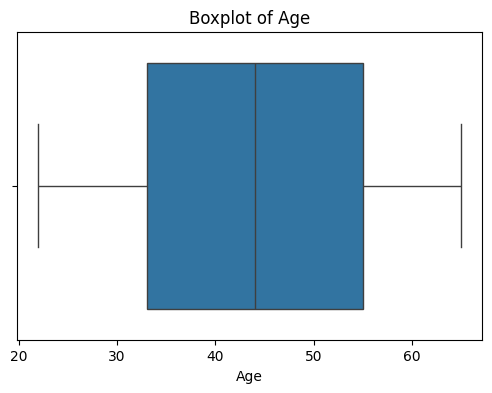

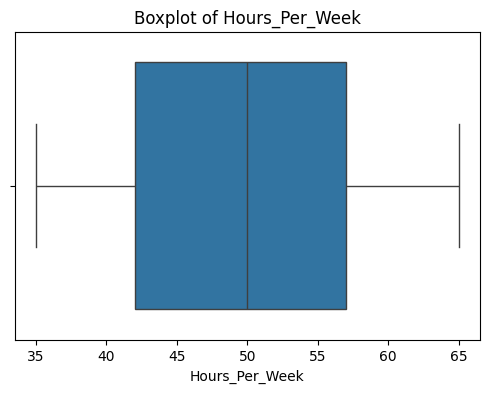

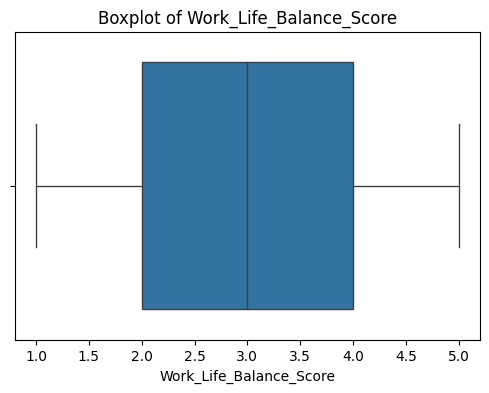

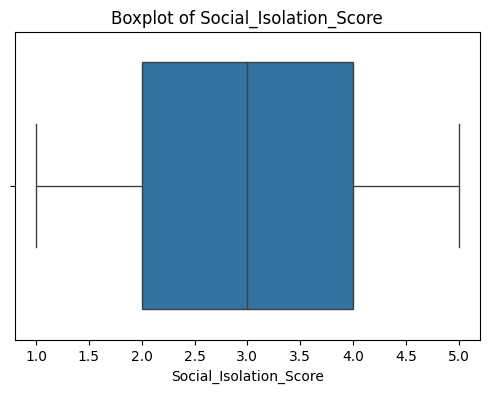

In [91]:
# Boxplots for numerics to spot outliers
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [92]:
# Standard deviation method
for col in numeric_cols:
    outliers = df[(np.abs(df[col] - df[col].mean()) > 3 * df[col].std())]
    print(f"{col}: {len(outliers)} outliers ")

Age: 0 outliers 
Hours_Per_Week: 0 outliers 
Work_Life_Balance_Score: 0 outliers 
Social_Isolation_Score: 0 outliers 


# **5. Visualizations**

Visualizations after handling missing data and outliers

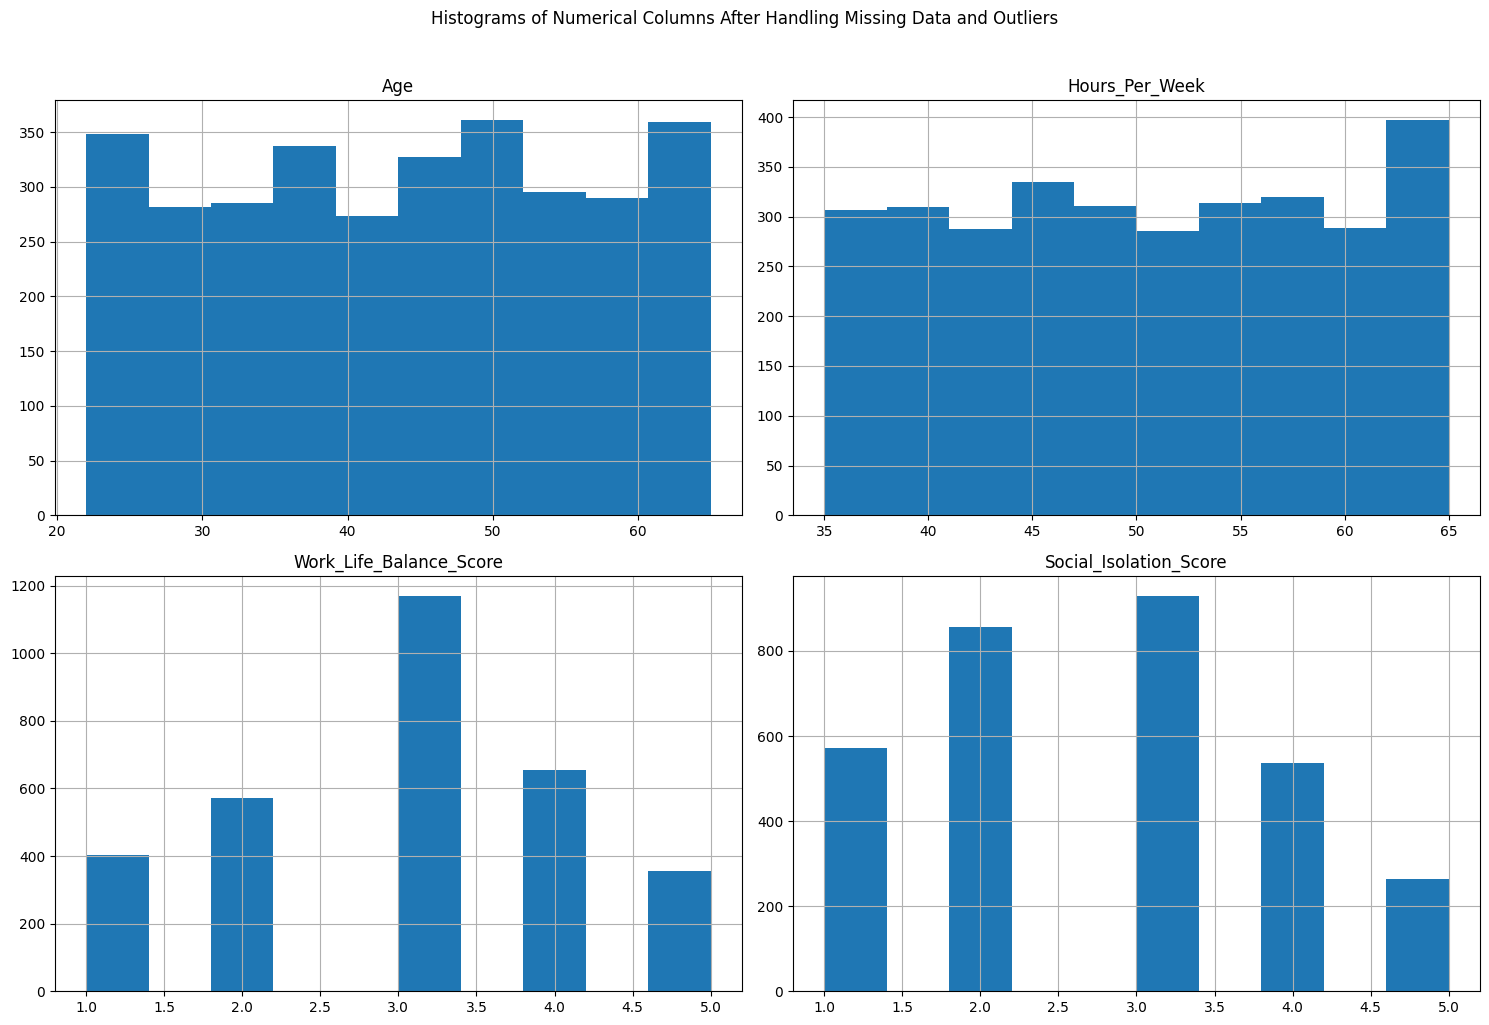

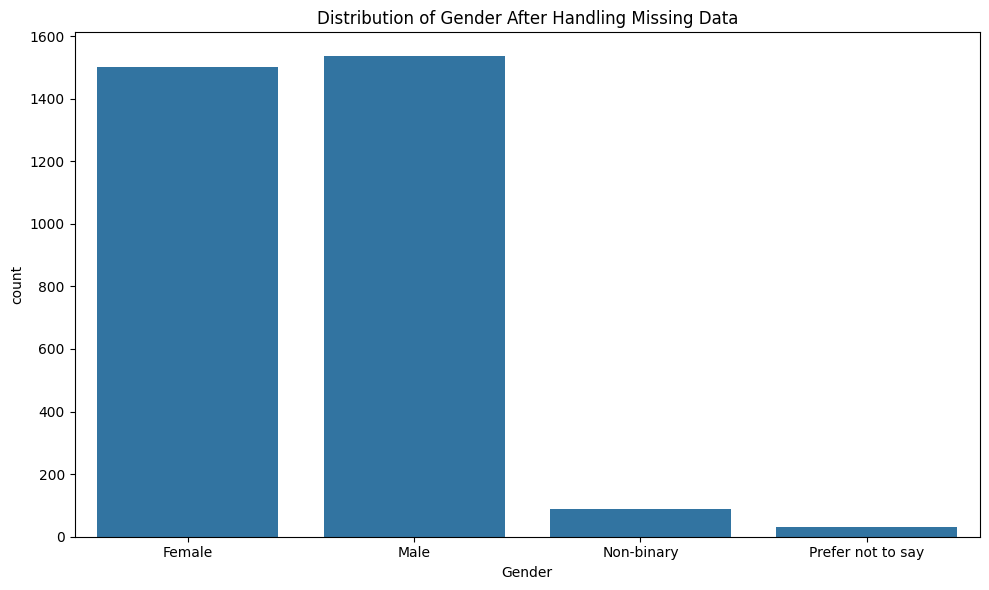

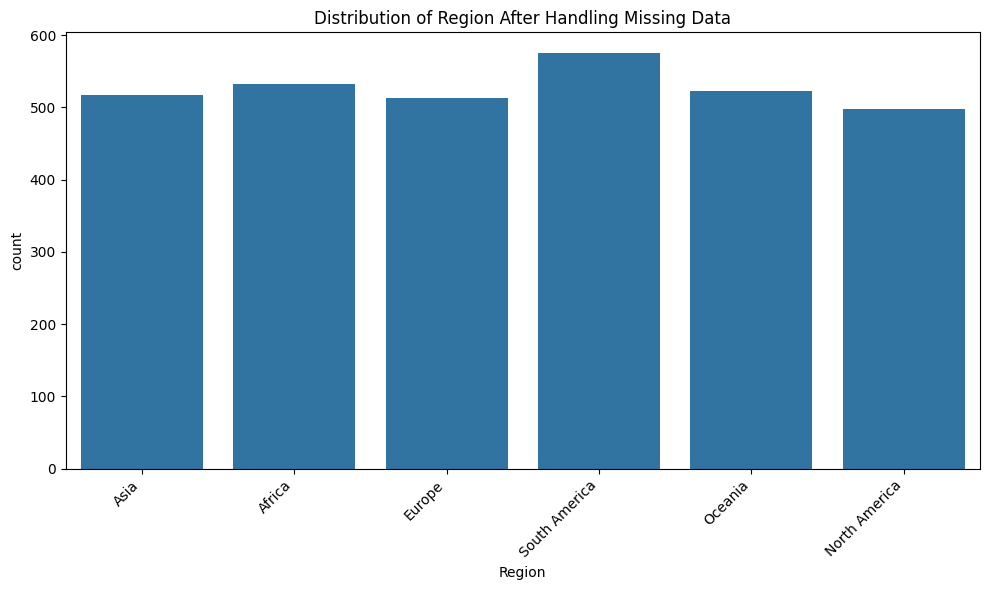

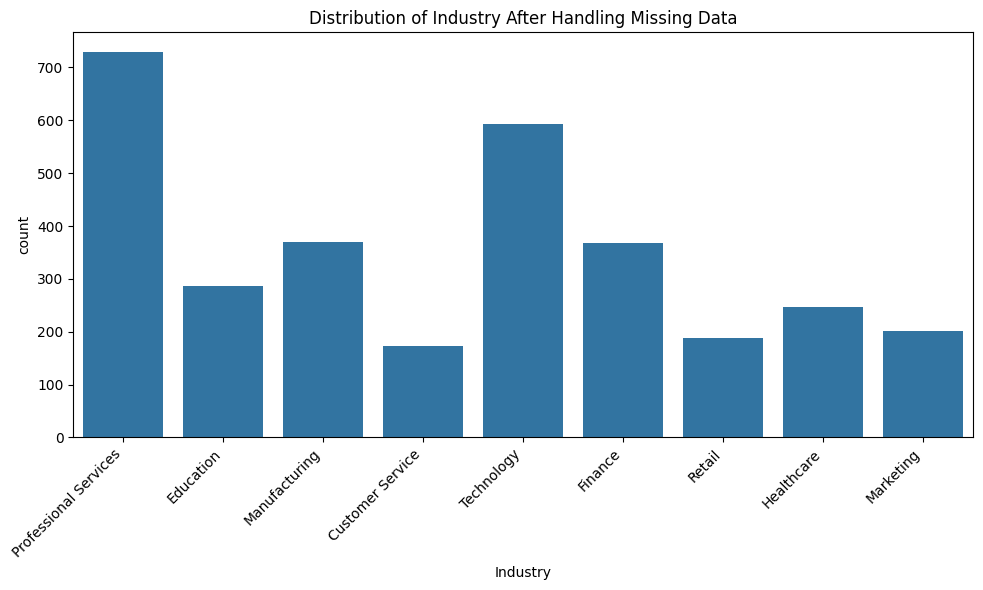

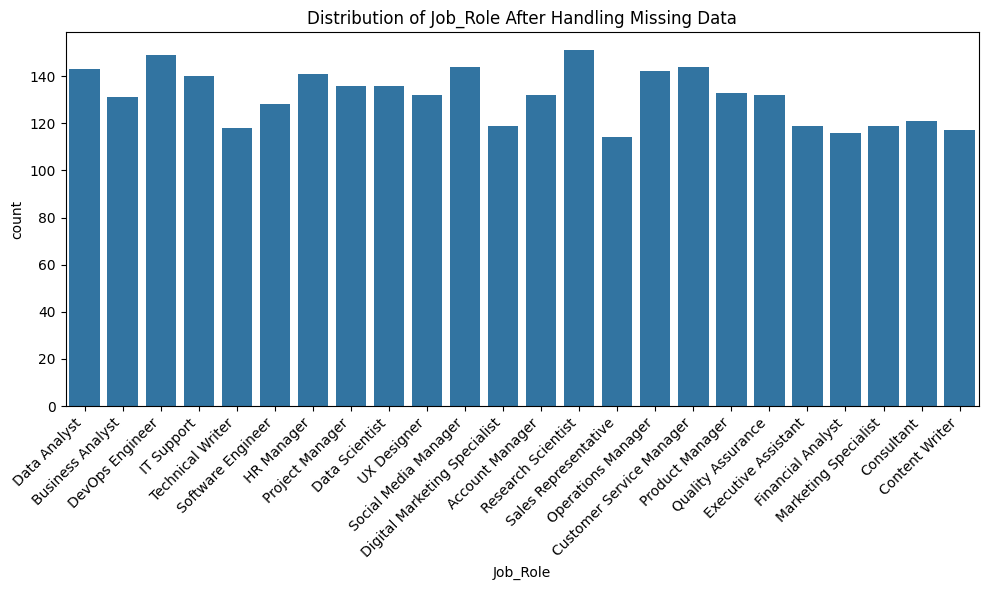

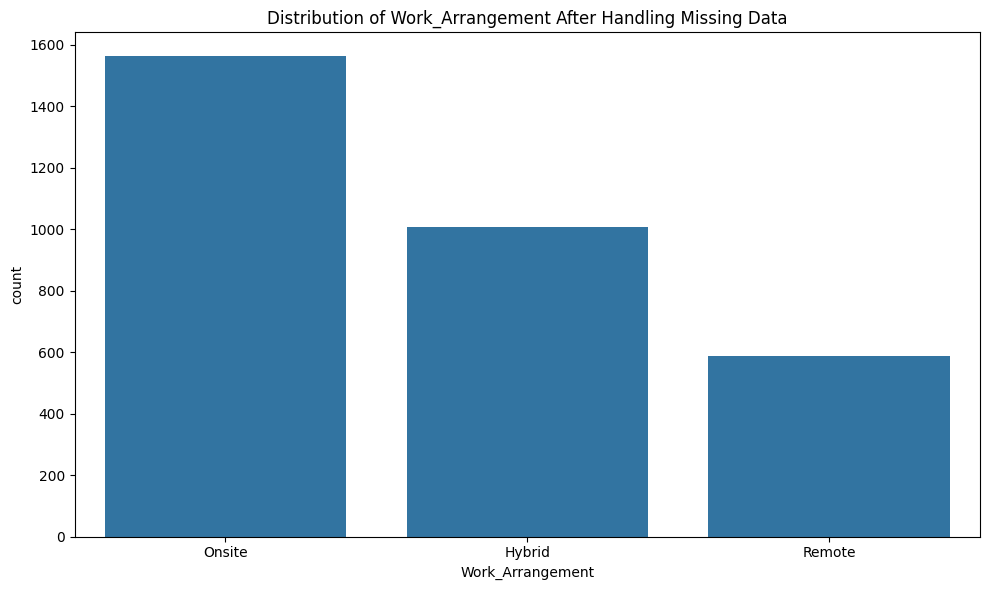

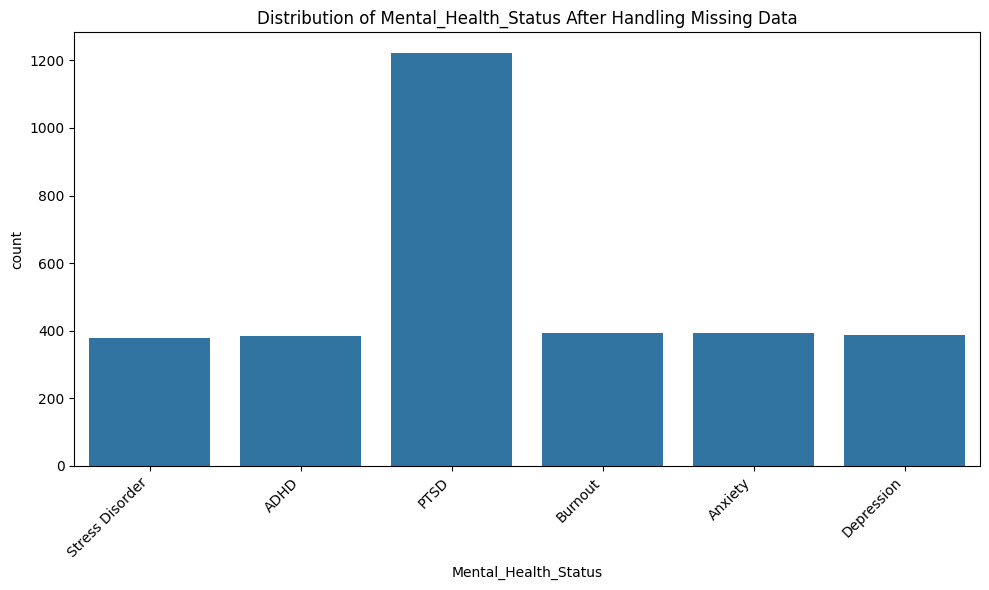

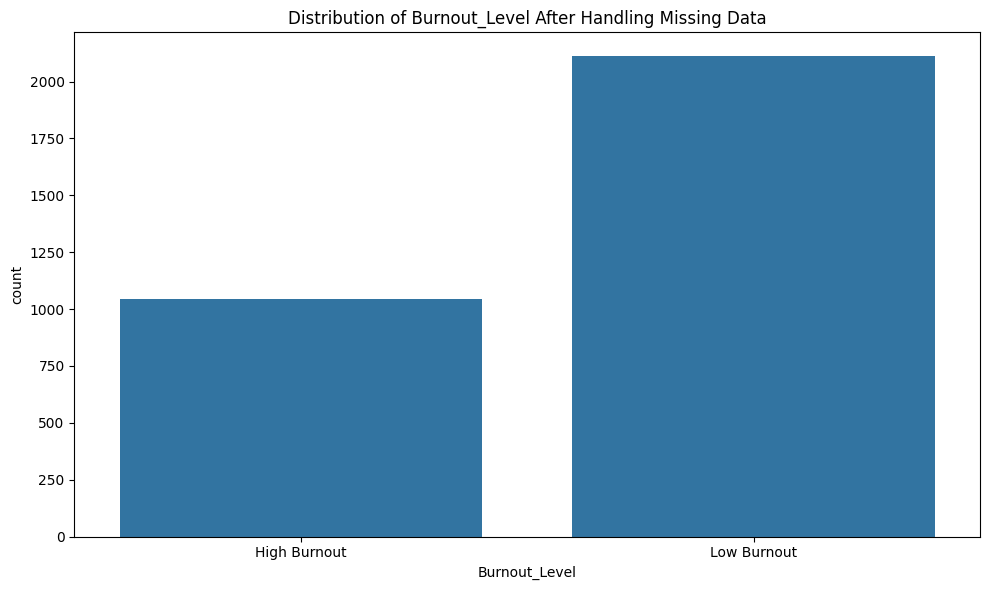

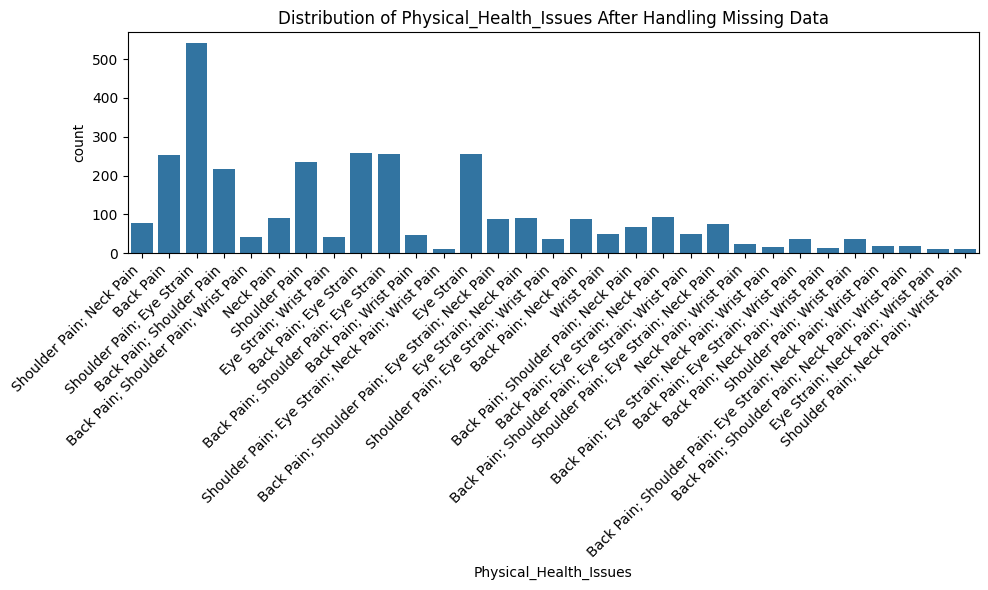

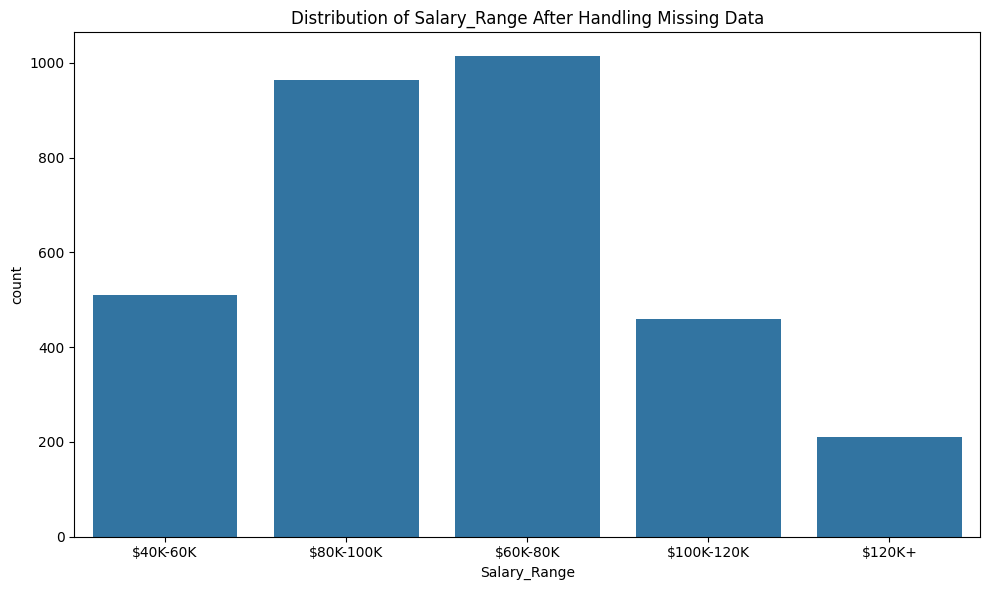

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_cols_after_handling = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols_after_handling].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns After Handling Missing Data and Outliers', y=1.02)
plt.tight_layout()
plt.show()

# Bar charts for categorical columns (including new missing indicators)
categorical_cols_after_handling = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols_after_handling:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    if df[col].nunique() > 5:
        plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col} After Handling Missing Data')
    plt.tight_layout()
    plt.show()

Correlation Analysis

Identify highly correlated numerical variables, calculate their correlation with the target variable

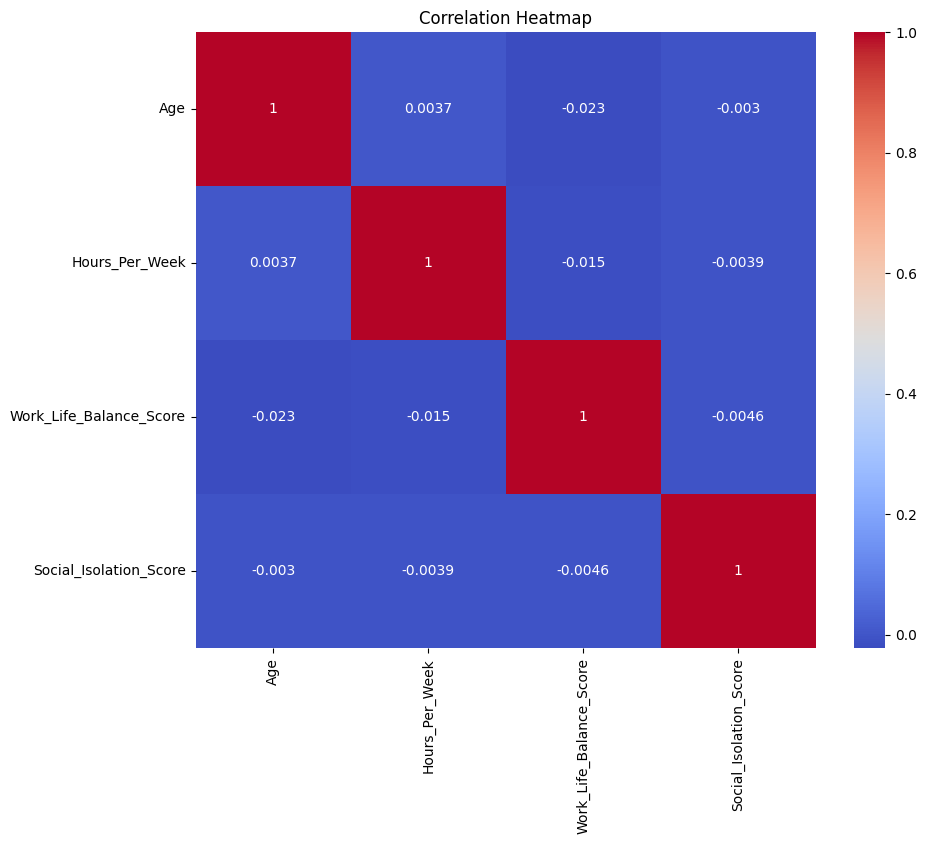

In [94]:
# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **6. Skewness**

In [95]:
# Skewness of numeric features
for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew():.2f}")

Age skewness: -0.04
Hours_Per_Week skewness: 0.02
Work_Life_Balance_Score skewness: -0.05
Social_Isolation_Score skewness: 0.24


# **7. Variable Handling & Relationships**

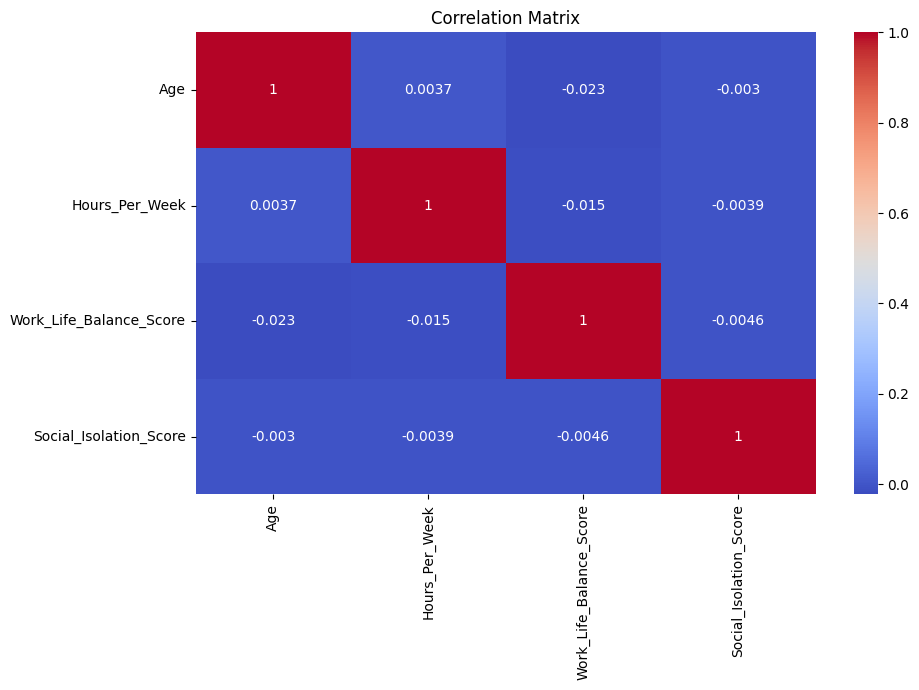

In [96]:
# Pearson correlation (heatmap)
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [97]:
# Chi-square tests for all categorical-categorical pairs
from scipy.stats import chi2_contingency
from itertools import combinations

cat_pairs = list(combinations([col for col in categorical_cols if col in df.columns], 2))
for c1, c2 in cat_pairs:
    contingency = pd.crosstab(df[c1], df[c2])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, _, _ = chi2_contingency(contingency)
        print(f"Chi-square {c1} vs {c2}: p={p:.4f}")

Chi-square Gender vs Region: p=0.0580
Chi-square Gender vs Industry: p=0.7592
Chi-square Gender vs Job_Role: p=0.5810
Chi-square Gender vs Work_Arrangement: p=0.4383
Chi-square Gender vs Mental_Health_Status: p=0.2117
Chi-square Gender vs Burnout_Level: p=0.5123
Chi-square Gender vs Physical_Health_Issues: p=0.0870
Chi-square Gender vs Salary_Range: p=0.6755
Chi-square Region vs Industry: p=0.8964
Chi-square Region vs Job_Role: p=0.7360
Chi-square Region vs Work_Arrangement: p=0.9186
Chi-square Region vs Mental_Health_Status: p=0.1592
Chi-square Region vs Burnout_Level: p=0.7418
Chi-square Region vs Physical_Health_Issues: p=0.2735
Chi-square Region vs Salary_Range: p=0.3061
Chi-square Industry vs Job_Role: p=0.5814
Chi-square Industry vs Work_Arrangement: p=0.0000
Chi-square Industry vs Mental_Health_Status: p=0.5601
Chi-square Industry vs Burnout_Level: p=0.0275
Chi-square Industry vs Physical_Health_Issues: p=0.2356
Chi-square Industry vs Salary_Range: p=0.3453
Chi-square Job_Role v

In [98]:
# ANOVA for numeric vs. categorical (target)
from scipy.stats import f_oneway

for col in numeric_cols:
    groups = [df[df['Burnout_Level'] == g][col] for g in df['Burnout_Level'].unique()]
    f, p = f_oneway(*groups)
    print(f"ANOVA {col} by Burnout_Level: p={p:.4f}")


ANOVA Age by Burnout_Level: p=0.6335
ANOVA Hours_Per_Week by Burnout_Level: p=0.6598
ANOVA Work_Life_Balance_Score by Burnout_Level: p=0.8111
ANOVA Social_Isolation_Score by Burnout_Level: p=0.0531


In [99]:
# Final Data Structure


In [100]:
df_cleaned = df.copy()
print("Cleaned DataFrame head:")
display(df_cleaned.head())

print("\nShape of Cleaned DataFrame:")
display(df_cleaned.shape)


Cleaned DataFrame head:


,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High Burnout,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High Burnout,4,Back Pain,2,$80K-100K
2,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High Burnout,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Low Burnout,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,Low Burnout,5,Shoulder Pain; Eye Strain,4,$60K-80K



Shape of Cleaned DataFrame:


(3157, 13)

# Decision Tree

In [101]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      3157 non-null   int64 
 1   Gender                   3157 non-null   object
 2   Region                   3157 non-null   object
 3   Industry                 3157 non-null   object
 4   Job_Role                 3157 non-null   object
 5   Work_Arrangement         3157 non-null   object
 6   Hours_Per_Week           3157 non-null   int64 
 7   Mental_Health_Status     3157 non-null   object
 8   Burnout_Level            3157 non-null   object
 9   Work_Life_Balance_Score  3157 non-null   int64 
 10  Physical_Health_Issues   3157 non-null   object
 11  Social_Isolation_Score   3157 non-null   int64 
 12  Salary_Range             3157 non-null   object
dtypes: int64(4), object(9)
memory usage: 320.8+ KB


In [102]:
# Identify categorical columns
categorical_cols_tree = df_tree.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_tree, columns=categorical_cols_tree, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Display the shape of the encoded DataFrame
display(df_encoded.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

## Data splitting

### Subtask:
Split the data into training and testing sets.


In [103]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_encoded.drop('Burnout_Level_Low Burnout', axis=1)
y = df_encoded['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2525, 84)
Shape of X_test: (632, 84)
Shape of y_train: (2525,)
Shape of y_test: (632,)


## Model training with gridsearchcv

### Subtask:
Train a Decision Tree Classifier using `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer

# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring=scoring, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Store the best estimator
best_dtc = grid_search.best_estimator_

## Model evaluation

### Subtask:
Evaluate the best model on both the training and testing sets using the specified metrics.


In [105]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred = best_dtc.predict(X_train)
y_train_proba = best_dtc.predict_proba(X_train)[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred = best_dtc.predict(X_test)
y_test_proba = best_dtc.predict_proba(X_test)[:, 1] # Probability for the positive class

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

# Calculate evaluation metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print the evaluation metrics
print("Training Set Metrics:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  F1 Score: {train_f1:.4f}")
print(f"  Recall: {train_recall:.4f}")
print(f"  ROC AUC: {train_roc_auc:.4f}")

print("\nTesting Set Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  F1 Score: {test_f1:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  ROC AUC: {test_roc_auc:.4f}")

Training Set Metrics:
  Accuracy: 0.7018
  Precision: 0.7095
  F1 Score: 0.8079
  Recall: 0.9378
  ROC AUC: 0.6394

Testing Set Metrics:
  Accuracy: 0.6440
  Precision: 0.6768
  F1 Score: 0.7711
  Recall: 0.8960
  ROC AUC: 0.5569


## Present results

### Subtask:
Display the best cross-validation score and the classification summary for both train and test data.


In [106]:
from sklearn.metrics import classification_report

# Print the best cross-validation score
print("Best cross-validation accuracy score:", grid_search.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print the classification report for the testing set
print("\nTesting Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Best cross-validation accuracy score: 0.6586138613861386

Training Set Classification Report:
              precision    recall  f1-score   support

       False       0.64      0.23      0.33       837
        True       0.71      0.94      0.81      1688

    accuracy                           0.70      2525
   macro avg       0.68      0.58      0.57      2525
weighted avg       0.69      0.70      0.65      2525


Testing Set Classification Report:
              precision    recall  f1-score   support

       False       0.39      0.13      0.20       209
        True       0.68      0.90      0.77       423

    accuracy                           0.64       632
   macro avg       0.53      0.51      0.49       632
weighted avg       0.58      0.64      0.58       632



## Data preprocessing

Handle categorical variables using one-hot encoding.


In [107]:
# Identify categorical columns
categorical_cols_tree = df_tree.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_rf = pd.get_dummies(df_tree, columns=categorical_cols_tree, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded_rf.head())

# Display the shape of the encoded DataFrame
display(df_encoded_rf.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

## Data splitting

Split the data into training and testing sets.


In [108]:
from sklearn.model_selection import train_test_split

# Separate features (X_rf) and target variable (y_rf)
X_rf = df_encoded_rf.drop('Burnout_Level_Low Burnout', axis=1)
y_rf = df_encoded_rf['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)

# Print the shapes of the resulting sets
print("Shape of X_train_rf:", X_train_rf.shape)
print("Shape of X_test_rf:", X_test_rf.shape)
print("Shape of y_train_rf:", y_train_rf.shape)
print("Shape of y_test_rf:", y_test_rf.shape)

Shape of X_train_rf: (2525, 84)
Shape of X_test_rf: (632, 84)
Shape of y_train_rf: (2525,)
Shape of y_test_rf: (632,)


## Model training with gridsearchcv

Train a Random Forest Classifier using `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define scoring metrics
scoring_rf = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, scoring=scoring_rf, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_rf, y_train_rf)

# Store the best estimator
best_rf_model = grid_search_rf.best_estimator_

## Model evaluation

Evaluate the best model on both the training and testing sets using the specified metrics.


In [110]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred_rf = best_rf_model.predict(X_train_rf)
y_train_proba_rf = best_rf_model.predict_proba(X_train_rf)[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred_rf = best_rf_model.predict(X_test_rf)
y_test_proba_rf = best_rf_model.predict_proba(X_test_rf)[:, 1] # Probability for the positive class

# Calculate evaluation metrics for training data
train_accuracy_rf = accuracy_score(y_train_rf, y_train_pred_rf)
train_precision_rf = precision_score(y_train_rf, y_train_pred_rf)
train_f1_rf = f1_score(y_train_rf, y_train_pred_rf)
train_recall_rf = recall_score(y_train_rf, y_train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train_rf, y_train_proba_rf)

# Calculate evaluation metrics for testing data
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)
test_precision_rf = precision_score(y_test_rf, y_test_pred_rf)
test_f1_rf = f1_score(y_test_rf, y_test_pred_rf)
test_recall_rf = recall_score(y_test_rf, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test_rf, y_test_proba_rf)

# Print the evaluation metrics
print("Training Set Metrics (Random Forest):")
print(f"  Accuracy: {train_accuracy_rf:.4f}")
print(f"  Precision: {train_precision_rf:.4f}")
print(f"  F1 Score: {train_f1_rf:.4f}")
print(f"  Recall: {train_recall_rf:.4f}")
print(f"  ROC AUC: {train_roc_auc_rf:.4f}")

print("\nTesting Set Metrics (Random Forest):")
print(f"  Accuracy: {test_accuracy_rf:.4f}")
print(f"  Precision: {test_precision_rf:.4f}")
print(f"  F1 Score: {test_f1_rf:.4f}")
print(f"  Recall: {test_recall_rf:.4f}")
print(f"  ROC AUC: {test_roc_auc_rf:.4f}")

Training Set Metrics (Random Forest):
  Accuracy: 0.7287
  Precision: 0.7115
  F1 Score: 0.8312
  Recall: 0.9994
  ROC AUC: 0.8941

Testing Set Metrics (Random Forest):
  Accuracy: 0.6598
  Precision: 0.6677
  F1 Score: 0.7939
  Recall: 0.9787
  ROC AUC: 0.5563


**Reasoning**:
Display the best cross-validation score and the classification summary for both train and test data as requested in the subtask.



In [111]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Random Forest):", grid_search_rf.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Random Forest):")
print(classification_report(y_train_rf, y_train_pred_rf))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Random Forest):")
print(classification_report(y_test_rf, y_test_pred_rf))

Best cross-validation accuracy score (Random Forest): 0.6728712871287129

Training Set Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.99      0.18      0.31       837
        True       0.71      1.00      0.83      1688

    accuracy                           0.73      2525
   macro avg       0.85      0.59      0.57      2525
weighted avg       0.80      0.73      0.66      2525


Testing Set Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.25      0.01      0.03       209
        True       0.67      0.98      0.79       423

    accuracy                           0.66       632
   macro avg       0.46      0.50      0.41       632
weighted avg       0.53      0.66      0.54       632



## Present results

Display the best cross-validation score and the classification summary for both train and test data.


In [112]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Random Forest):", grid_search_rf.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Random Forest):")
print(classification_report(y_train_rf, y_train_pred_rf))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Random Forest):")
print(classification_report(y_test_rf, y_test_pred_rf))

Best cross-validation accuracy score (Random Forest): 0.6728712871287129

Training Set Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.99      0.18      0.31       837
        True       0.71      1.00      0.83      1688

    accuracy                           0.73      2525
   macro avg       0.85      0.59      0.57      2525
weighted avg       0.80      0.73      0.66      2525


Testing Set Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.25      0.01      0.03       209
        True       0.67      0.98      0.79       423

    accuracy                           0.66       632
   macro avg       0.46      0.50      0.41       632
weighted avg       0.53      0.66      0.54       632



## Data preprocessing

Handle categorical variables using one-hot encoding.

In [113]:
# Identify categorical columns
categorical_cols_tree = df_tree.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_gb = pd.get_dummies(df_tree, columns=categorical_cols_tree, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded_gb.head())

# Display the shape of the encoded DataFrame
display(df_encoded_gb.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

## Data splitting

Split the data into training and testing sets.

In [114]:
from sklearn.model_selection import train_test_split

# Separate features (X_gb) and target variable (y_gb)
X_gb = df_encoded_gb.drop('Burnout_Level_Low Burnout', axis=1)
y_gb = df_encoded_gb['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y_gb, test_size=0.2, random_state=42, stratify=y_gb)

# Print the shapes of the resulting sets
print("Shape of X_train_gb:", X_train_gb.shape)
print("Shape of X_test_gb:", X_test_gb.shape)
print("Shape of y_train_gb:", y_train_gb.shape)
print("Shape of y_test_gb:", y_test_gb.shape)

Shape of X_train_gb: (2525, 84)
Shape of X_test_gb: (632, 84)
Shape of y_train_gb: (2525,)
Shape of y_test_gb: (632,)


## Model training with gridsearchcv

Train a Gradient Boosting Classifier using `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer

# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define scoring metrics
scoring_gb = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Instantiate GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, scoring=scoring_gb, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data
grid_search_gb.fit(X_train_gb, y_train_gb)

# Store the best estimator
best_gb_model = grid_search_gb.best_estimator_

## Model evaluation

Evaluate the best model on both the training and testing sets using the specified metrics.

In [116]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred_gb = best_gb_model.predict(X_train_gb)
y_train_proba_gb = best_gb_model.predict_proba(X_train_gb)[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred_gb = best_gb_model.predict(X_test_gb)
y_test_proba_gb = best_gb_model.predict_proba(X_test_gb)[:, 1] # Probability for the positive class

# Calculate evaluation metrics for training data
train_accuracy_gb = accuracy_score(y_train_gb, y_train_pred_gb)
train_precision_gb = precision_score(y_train_gb, y_train_pred_gb)
train_f1_gb = f1_score(y_train_gb, y_train_pred_gb)
train_recall_gb = recall_score(y_train_gb, y_train_pred_gb)
train_roc_auc_gb = roc_auc_score(y_train_gb, y_train_proba_gb)

# Calculate evaluation metrics for testing data
test_accuracy_gb = accuracy_score(y_test_gb, y_test_pred_gb)
test_precision_gb = precision_score(y_test_gb, y_test_pred_gb)
test_f1_gb = f1_score(y_test_gb, y_test_pred_gb)
test_recall_gb = recall_score(y_test_gb, y_test_pred_gb)
test_roc_auc_gb = roc_auc_score(y_test_gb, y_test_proba_gb)

# Print the evaluation metrics
print("Training Set Metrics (Gradient Boosting):")
print(f"  Accuracy: {train_accuracy_gb:.4f}")
print(f"  Precision: {train_precision_gb:.4f}")
print(f"  F1 Score: {train_f1_gb:.4f}")
print(f"  Recall: {train_recall_gb:.4f}")
print(f"  ROC AUC: {train_roc_auc_gb:.4f}")

print("\nTesting Set Metrics (Gradient Boosting):")
print(f"  Accuracy: {test_accuracy_gb:.4f}")
print(f"  Precision: {test_precision_gb:.4f}")
print(f"  F1 Score: {test_f1_gb:.4f}")
print(f"  Recall: {test_recall_gb:.4f}")
print(f"  ROC AUC: {test_roc_auc_gb:.4f}")

Training Set Metrics (Gradient Boosting):
  Accuracy: 0.7303
  Precision: 0.7136
  F1 Score: 0.8316
  Recall: 0.9964
  ROC AUC: 0.7654

Testing Set Metrics (Gradient Boosting):
  Accuracy: 0.6614
  Precision: 0.6739
  F1 Score: 0.7910
  Recall: 0.9574
  ROC AUC: 0.5396


## Present results
Display the best cross-validation score and the classification summary for both train and test data.

In [117]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Gradient Boosting):", grid_search_gb.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Gradient Boosting):")
print(classification_report(y_train_gb, y_train_pred_gb))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Gradient Boosting):")
print(classification_report(y_test_gb, y_test_pred_gb))

Best cross-validation accuracy score (Gradient Boosting): 0.6697029702970297

Training Set Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.96      0.19      0.32       837
        True       0.71      1.00      0.83      1688

    accuracy                           0.73      2525
   macro avg       0.84      0.59      0.58      2525
weighted avg       0.80      0.73      0.66      2525


Testing Set Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

       False       0.42      0.06      0.11       209
        True       0.67      0.96      0.79       423

    accuracy                           0.66       632
   macro avg       0.55      0.51      0.45       632
weighted avg       0.59      0.66      0.57       632



## Data preprocessing

Handle categorical variables using one-hot encoding.

In [118]:
# Identify categorical columns
categorical_cols_lr = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_lr = pd.get_dummies(df_cleaned, columns=categorical_cols_lr, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded_lr.head())

# Display the shape of the encoded DataFrame
display(df_encoded_lr.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

## Data splitting

Split the data into training and testing sets.

In [119]:
from sklearn.model_selection import train_test_split

# Separate features (X_lr) and target variable (y_lr)
X_lr = df_encoded_lr.drop('Burnout_Level_Low Burnout', axis=1)
y_lr = df_encoded_lr['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr)

# Print the shapes of the resulting sets
print("Shape of X_train_lr:", X_train_lr.shape)
print("Shape of X_test_lr:", X_test_lr.shape)
print("Shape of y_train_lr:", y_train_lr.shape)
print("Shape of y_test_lr:", y_test_lr.shape)

Shape of X_train_lr: (2525, 84)
Shape of X_test_lr: (632, 84)
Shape of y_train_lr: (2525,)
Shape of y_test_lr: (632,)


## Model training with gridsearchcv

Train a Logistic Regression model using `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Define parameter grid
param_grid_lr = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'], # Logistic Regression with liblinear solver only supports l2 penalty
    'logisticregression__solver': ['liblinear']
}

# Define scoring metrics
scoring_lr = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Create a pipeline for scaling and logistic regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(random_state=42))
])


# Instantiate GridSearchCV
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=scoring_lr, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data
grid_search_lr.fit(X_train_lr, y_train_lr)

# Store the best estimator
best_lr_model = grid_search_lr.best_estimator_

## Model evaluation

Evaluate the best model on both the training and testing sets using the specified metrics.

In [121]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred_lr = best_lr_model.predict(X_train_lr)
y_train_proba_lr = best_lr_model.predict_proba(X_train_lr)[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred_lr = best_lr_model.predict(X_test_lr)
y_test_proba_lr = best_lr_model.predict_proba(X_test_lr)[:, 1] # Probability for the positive class

# Calculate evaluation metrics for training data
train_accuracy_lr = accuracy_score(y_train_lr, y_train_pred_lr)
train_precision_lr = precision_score(y_train_lr, y_train_pred_lr)
train_f1_lr = f1_score(y_train_lr, y_train_pred_lr)
train_recall_lr = recall_score(y_train_lr, y_train_pred_lr)
train_roc_auc_lr = roc_auc_score(y_train_lr, y_train_proba_lr)

# Calculate evaluation metrics for testing data
test_accuracy_lr = accuracy_score(y_test_lr, y_test_pred_lr)
test_precision_lr = precision_score(y_test_lr, y_test_pred_lr)
test_f1_lr = f1_score(y_test_lr, y_test_pred_lr)
test_recall_lr = recall_score(y_test_lr, y_test_pred_lr)
test_roc_auc_lr = roc_auc_score(y_test_lr, y_test_proba_lr)

# Print the evaluation metrics
print("Training Set Metrics (Logistic Regression):")
print(f"  Accuracy: {train_accuracy_lr:.4f}")
print(f"  Precision: {train_precision_lr:.4f}")
print(f"  F1 Score: {train_f1_lr:.4f}")
print(f"  Recall: {train_recall_lr:.4f}")
print(f"  ROC AUC: {train_roc_auc_lr:.4f}")

print("\nTesting Set Metrics (Logistic Regression):")
print(f"  Accuracy: {test_accuracy_lr:.4f}")
print(f"  Precision: {test_precision_lr:.4f}")
print(f"  F1 Score: {test_f1_lr:.4f}")
print(f"  Recall: {test_recall_lr:.4f}")
print(f"  ROC AUC: {test_roc_auc_lr:.4f}")

Training Set Metrics (Logistic Regression):
  Accuracy: 0.6887
  Precision: 0.6978
  F1 Score: 0.8019
  Recall: 0.9425
  ROC AUC: 0.6468

Testing Set Metrics (Logistic Regression):
  Accuracy: 0.6408
  Precision: 0.6725
  F1 Score: 0.7709
  Recall: 0.9031
  ROC AUC: 0.5371


In [122]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Logistic Regression):", grid_search_lr.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Logistic Regression):")
print(classification_report(y_train_lr, y_train_pred_lr))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Logistic Regression):")
print(classification_report(y_test_lr, y_test_pred_lr))

Best cross-validation accuracy score (Logistic Regression): 0.6578217821782179

Training Set Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.60      0.18      0.27       837
        True       0.70      0.94      0.80      1688

    accuracy                           0.69      2525
   macro avg       0.65      0.56      0.54      2525
weighted avg       0.67      0.69      0.63      2525


Testing Set Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.36      0.11      0.17       209
        True       0.67      0.90      0.77       423

    accuracy                           0.64       632
   macro avg       0.52      0.51      0.47       632
weighted avg       0.57      0.64      0.57       632



In [123]:
# Identify categorical columns
categorical_cols_fr = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_fr = pd.get_dummies(df_cleaned, columns=categorical_cols_fr, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded_fr.head())

# Display the shape of the encoded DataFrame
display(df_encoded_fr.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

In [124]:
from sklearn.model_selection import train_test_split

# Separate features (X_fr) and target variable (y_fr)
X_fr = df_encoded_fr.drop('Burnout_Level_Low Burnout', axis=1)
y_fr = df_encoded_fr['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(X_fr, y_fr, test_size=0.2, random_state=42, stratify=y_fr)

# Print the shapes of the resulting sets
print("Shape of X_train_fr:", X_train_fr.shape)
print("Shape of X_test_fr:", X_test_fr.shape)
print("Shape of y_train_fr:", y_train_fr.shape)
print("Shape of y_test_fr:", y_test_fr.shape)

Shape of X_train_fr: (2525, 84)
Shape of X_test_fr: (632, 84)
Shape of y_train_fr: (2525,)
Shape of y_test_fr: (632,)


## Implement Forward Selection

Implement a forward selection process to identify the best subset of features using cross-validation with ROC AUC as the scoring metric.

In [125]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shapes of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Display the value counts of the resampled target variable
print("\nValue counts of y_train_resampled:")
display(y_train_resampled.value_counts())

Shape of X_train_resampled: (3376, 84)
Shape of y_train_resampled: (3376,)

Value counts of y_train_resampled:


,count
Burnout_Level_Low Burnout,
True,1688
False,1688


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Import SFS

def forward_selection(X_train, y_train, scoring='roc_auc'):
    """
    Performs forward selection to find the best subset of features.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.
        scoring (str): Scoring metric for cross-validation.

    Returns:
        list: List of the best features selected.
    """
    best_features = []
    remaining_features = list(X_train.columns)

    while remaining_features:
        best_score = -1
        feature_to_add = None

        for feature in remaining_features:
            current_features = best_features + [feature]
            X_subset = X_train[current_features]

            # Use a simple Logistic Regression model for feature selection
            model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

            # Perform cross-validation
            scores = cross_val_score(model, X_subset, y_train, cv=5, scoring=scoring)
            mean_score = scores.mean()

            if mean_score > best_score:
                best_score = mean_score
                feature_to_add = feature

        if feature_to_add:
            best_features.append(feature_to_add)
            remaining_features.remove(feature_to_add)
            print(f"Added feature: {feature_to_add} (Cross-validation {scoring}: {best_score:.4f})")
        else:
            # Stop if no feature improves the score
            break
    return best_features

# Apply forward selection
best_features_fr = forward_selection(X_train_resampled, y_train_resampled, scoring='roc_auc')

print("\nSelected features through forward selection:", best_features_fr)

Added feature: Work_Arrangement_Onsite (Cross-validation roc_auc: 0.6306)
Added feature: Gender_Male (Cross-validation roc_auc: 0.6642)
Added feature: Social_Isolation_Score (Cross-validation roc_auc: 0.6750)
Added feature: Salary_Range_$60K-80K (Cross-validation roc_auc: 0.6841)
Added feature: Salary_Range_$80K-100K (Cross-validation roc_auc: 0.7043)
Added feature: Salary_Range_$40K-60K (Cross-validation roc_auc: 0.7168)
Added feature: Salary_Range_$120K+ (Cross-validation roc_auc: 0.7339)
Added feature: Physical_Health_Issues_Shoulder Pain (Cross-validation roc_auc: 0.7385)
Added feature: Physical_Health_Issues_Back Pain; Shoulder Pain; Eye Strain (Cross-validation roc_auc: 0.7418)
Added feature: Physical_Health_Issues_Back Pain; Shoulder Pain (Cross-validation roc_auc: 0.7452)
Added feature: Industry_Professional Services (Cross-validation roc_auc: 0.7481)
Added feature: Physical_Health_Issues_Shoulder Pain; Neck Pain (Cross-validation roc_auc: 0.7512)
Added feature: Region_North Am

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

model_fwd = LogisticRegression(max_iter=1000, solver='liblinear')
model_fwd.fit(X_train_resampled[best_features_fr], y_train_resampled)
y_pred_fwd = model_fwd.predict_proba(X_test[best_features_fr])[:, 1] # Use X_test with selected features

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_fwd_binary = (y_pred_fwd > 0.5).astype(int)

roc_fwd = roc_auc_score(y_test, y_pred_fwd) # Use y_test
print(f"Forward Logistic Regression - ROC AUC: {roc_fwd:.4f}")
print("\nLogistic Regression Classification Report (Testing Set with Forward Selection):\n")
print(classification_report(y_test, y_pred_fwd_binary)) # Use y_test and y_pred_fwd_binary

Forward Logistic Regression - ROC AUC: 0.5193

Logistic Regression Classification Report (Testing Set with Forward Selection):

              precision    recall  f1-score   support

       False       0.35      0.19      0.24       209
        True       0.67      0.83      0.74       423

    accuracy                           0.61       632
   macro avg       0.51      0.51      0.49       632
weighted avg       0.56      0.61      0.58       632



# Backward Selection

In [128]:
#BACKWARD REGRESSION
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Import SFS
from sklearn.linear_model import LogisticRegression

backward_selector = SFS(LogisticRegression(max_iter=1000, solver='liblinear'), k_features='best', forward=False, floating=False, scoring='roc_auc', cv=5)

backward_selector = backward_selector.fit(X_train_resampled, y_train_resampled)
selected_backward = list(backward_selector.k_feature_names_)
print("Backward selected features:", selected_backward)

model_bwd = LogisticRegression(max_iter=1000, solver='liblinear')
model_bwd.fit(X_train_resampled[selected_backward], y_train_resampled)
y_pred_bwd = model_bwd.predict_proba(X_test[selected_backward])[:, 1] # Use X_test_encoded

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_bwd_binary = (y_pred_bwd > 0.5).astype(int)


accuracy_bw = accuracy_score(y_test, y_pred_bwd_binary) # Use y_test_numeric
roc_bwd = roc_auc_score(y_test, y_pred_bwd) # Use y_test_numeric
print(f"Backward Logistic Regression - Accuracy: {accuracy_bw:.4f}, ROC AUC: {roc_bwd:.4f}")
print("\nLogistic Regression Classification Report (Testing Set with GridSearchCV):\n")
print(classification_report(y_test, y_pred_bwd_binary)) # Use y_test_numeric and y_pred_bwd_binary

Backward selected features: ['Gender_Male', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America', 'Industry_Education', 'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Marketing', 'Industry_Professional Services', 'Industry_Retail', 'Industry_Technology', 'Job_Role_Business Analyst', 'Job_Role_Consultant', 'Job_Role_Content Writer', 'Job_Role_Customer Service Manager', 'Job_Role_Data Analyst', 'Job_Role_Data Scientist', 'Job_Role_DevOps Engineer', 'Job_Role_Digital Marketing Specialist', 'Job_Role_Executive Assistant', 'Job_Role_Financial Analyst', 'Job_Role_IT Support', 'Job_Role_Marketing Specialist', 'Job_Role_Operations Manager', 'Job_Role_Product Manager', 'Job_Role_Project Manager', 'Job_Role_Quality Assurance', 'Job_Role_Research Scientist', 'Job_Role_Sales Representative', 'Job_Role_Social Media Manager', 'Job_Role_Technical Writer', 'Job_Role_UX Designer', 'Work_Arrangement_Onsite', 'Work_Arrangement_Remote', 'Mental_

## Model training with gridsearchcv

Train a Logistic Regression model using the selected features and `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define parameter grid
param_grid_lr_bwd = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear']
}

# Define scoring metrics
scoring_lr_bwd = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Create a pipeline for scaling and logistic regression with selected features
pipeline_lr_bwd = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(random_state=42))
])

# Instantiate GridSearchCV
grid_search_lr_bwd = GridSearchCV(estimator=pipeline_lr_bwd, param_grid=param_grid_lr_bwd, scoring=scoring_lr_bwd, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data with selected features
grid_search_lr_bwd.fit(X_train_resampled[selected_backward], y_train_resampled)

# Store the best estimator
best_lr_model_bwd = grid_search_lr_bwd.best_estimator_

## Model evaluation

Evaluate the best model on both the training and testing sets using the specified metrics.

In [130]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred_lr_bwd = best_lr_model_bwd.predict(X_train_resampled[selected_backward])
y_train_proba_lr_bwd = best_lr_model_bwd.predict_proba(X_train_resampled[selected_backward])[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred_lr_bwd = best_lr_model_bwd.predict(X_test[selected_backward])
y_test_proba_lr_bwd = best_lr_model_bwd.predict_proba(X_test[selected_backward])[:, 1] # Probability for the positive class

# Calculate evaluation metrics for training data
train_accuracy_lr_bwd = accuracy_score(y_train_resampled, y_train_pred_lr_bwd)
train_precision_lr_bwd = precision_score(y_train_resampled, y_train_pred_lr_bwd)
train_f1_lr_bwd = f1_score(y_train_resampled, y_train_pred_lr_bwd)
train_recall_lr_bwd = recall_score(y_train_resampled, y_train_pred_lr_bwd)
train_roc_auc_lr_bwd = roc_auc_score(y_train_resampled, y_train_proba_lr_bwd)

# Calculate evaluation metrics for testing data
test_accuracy_lr_bwd = accuracy_score(y_test, y_test_pred_lr_bwd)
test_precision_lr_bwd = precision_score(y_test, y_test_pred_lr_bwd)
test_f1_lr_bwd = f1_score(y_test, y_test_pred_lr_bwd)
test_recall_lr_bwd = recall_score(y_test, y_test_pred_lr_bwd)
test_roc_auc_lr_bwd = roc_auc_score(y_test, y_test_proba_lr_bwd)

# Print the evaluation metrics
print("Training Set Metrics (Logistic Regression with Backward Selection):")
print(f"  Accuracy: {train_accuracy_lr_bwd:.4f}")
print(f"  Precision: {train_precision_lr_bwd:.4f}")
print(f"  F1 Score: {train_f1_lr_bwd:.4f}")
print(f"  Recall: {train_recall_lr_bwd:.4f}")
print(f"  ROC AUC: {train_roc_auc_lr_bwd:.4f}")

print("\nTesting Set Metrics (Logistic Regression with Backward Selection):")
print(f"  Accuracy: {test_accuracy_lr_bwd:.4f}")
print(f"  Precision: {test_precision_lr_bwd:.4f}")
print(f"  F1 Score: {test_f1_lr_bwd:.4f}")
print(f"  Recall: {test_recall_lr_bwd:.4f}")
print(f"  ROC AUC: {test_roc_auc_lr_bwd:.4f}")

Training Set Metrics (Logistic Regression with Backward Selection):
  Accuracy: 0.7299
  Precision: 0.6948
  F1 Score: 0.7522
  Recall: 0.8199
  ROC AUC: 0.8040

Testing Set Metrics (Logistic Regression with Backward Selection):
  Accuracy: 0.6044
  Precision: 0.6686
  F1 Score: 0.7329
  Recall: 0.8109
  ROC AUC: 0.5080


## Present results

Display the best cross-validation score and the classification summary for both train and test data.

In [131]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Logistic Regression with Backward Selection):", grid_search_lr_bwd.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Logistic Regression with Backward Selection):")
print(classification_report(y_train_resampled, y_train_pred_lr_bwd))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Logistic Regression with Backward Selection):")
print(classification_report(y_test, y_test_pred_lr_bwd))

Best cross-validation accuracy score (Logistic Regression with Backward Selection): 0.7008840674994521

Training Set Classification Report (Logistic Regression with Backward Selection):
              precision    recall  f1-score   support

       False       0.78      0.64      0.70      1688
        True       0.69      0.82      0.75      1688

    accuracy                           0.73      3376
   macro avg       0.74      0.73      0.73      3376
weighted avg       0.74      0.73      0.73      3376


Testing Set Classification Report (Logistic Regression with Backward Selection):
              precision    recall  f1-score   support

       False       0.33      0.19      0.24       209
        True       0.67      0.81      0.73       423

    accuracy                           0.60       632
   macro avg       0.50      0.50      0.49       632
weighted avg       0.56      0.60      0.57       632



## Data preprocessing

Handle categorical variables using one-hot encoding.

In [132]:
# Identify categorical columns
categorical_cols_sw = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_sw = pd.get_dummies(df_cleaned, columns=categorical_cols_sw, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded_sw.head())

# Display the shape of the encoded DataFrame
display(df_encoded_sw.shape)

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,27,64,3,2,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,37,37,4,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,32,36,3,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40,63,1,2,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,30,65,5,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


(3157, 85)

In [133]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features (X_sw) and target variable (y_sw)
X_sw = df_encoded_sw.drop('Burnout_Level_Low Burnout', axis=1)
y_sw = df_encoded_sw['Burnout_Level_Low Burnout']

# Split data into training and testing sets
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_sw, y_sw, test_size=0.2, random_state=42, stratify=y_sw)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled_sw, y_train_resampled_sw = smote.fit_resample(X_train_sw, y_train_sw)


# Print the shapes of the resulting sets
print("Shape of X_train_sw:", X_train_sw.shape)
print("Shape of X_test_sw:", X_test_sw.shape)
print("Shape of y_train_sw:", y_train_sw.shape)
print("Shape of y_test_sw:", y_test_sw.shape)
print("\nShape of X_train_resampled_sw:", X_train_resampled_sw.shape)
print("Shape of y_train_resampled_sw:", y_train_resampled_sw.shape)
print("\nValue counts of y_train_resampled_sw:")
display(y_train_resampled_sw.value_counts())

Shape of X_train_sw: (2525, 84)
Shape of X_test_sw: (632, 84)
Shape of y_train_sw: (2525,)
Shape of y_test_sw: (632,)

Shape of X_train_resampled_sw: (3376, 84)
Shape of y_train_resampled_sw: (3376,)

Value counts of y_train_resampled_sw:


,count
Burnout_Level_Low Burnout,
True,1688
False,1688


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

def stepwise_selection(X_train, y_train, scoring='roc_auc'):
    """
    Performs stepwise selection to find the best subset of features.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series): Training target variable.
        scoring (str): Scoring metric for cross-validation.

    Returns:
        list: List of the best features selected.
    """
    sfs = SFS(LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
              k_features='best',
              forward=True,
              floating=True,  # Set to True for stepwise selection
              scoring=scoring,
              cv=5,
              n_jobs=-1)

    sfs = sfs.fit(X_train, y_train)

    return list(sfs.k_feature_names_)

# Apply stepwise selection
best_features_sw = stepwise_selection(X_train_resampled_sw, y_train_resampled_sw, scoring='roc_auc')

print("\nSelected features through stepwise selection:", best_features_sw)


Selected features through stepwise selection: ['Hours_Per_Week', 'Social_Isolation_Score', 'Gender_Male', 'Region_Europe', 'Region_North America', 'Region_Oceania', 'Region_South America', 'Industry_Education', 'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Marketing', 'Industry_Professional Services', 'Industry_Technology', 'Job_Role_Consultant', 'Job_Role_Content Writer', 'Job_Role_Customer Service Manager', 'Job_Role_Data Analyst', 'Job_Role_Data Scientist', 'Job_Role_DevOps Engineer', 'Job_Role_Digital Marketing Specialist', 'Job_Role_Executive Assistant', 'Job_Role_Financial Analyst', 'Job_Role_Operations Manager', 'Job_Role_Product Manager', 'Job_Role_Project Manager', 'Job_Role_Quality Assurance', 'Job_Role_Social Media Manager', 'Job_Role_Technical Writer', 'Job_Role_UX Designer', 'Work_Arrangement_Onsite', 'Work_Arrangement_Remote', 'Mental_Health_Status_Anxiety', 'Mental_Health_Status_Burnout', 'Mental_Health_Status_Depression', 'Physical_Heal

## Model training with gridsearchcv

Train a Logistic Regression model using the selected features and `GridSearchCV` to find the best hyperparameters, using accuracy, precision, F1 score, recall, and ROC AUC as evaluation metrics.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define parameter grid
param_grid_lr_sw = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear']
}

# Define scoring metrics
scoring_lr_sw = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Create a pipeline for scaling and logistic regression with selected features
pipeline_lr_sw = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(random_state=42))
])

# Instantiate GridSearchCV
grid_search_lr_sw = GridSearchCV(estimator=pipeline_lr_sw, param_grid=param_grid_lr_sw, scoring=scoring_lr_sw, cv=5, refit='accuracy')

# Fit GridSearchCV to the training data with selected features
grid_search_lr_sw.fit(X_train_resampled_sw[best_features_sw], y_train_resampled_sw)

# Store the best estimator
best_lr_model_sw = grid_search_lr_sw.best_estimator_

## Model evaluation

Evaluate the best model on both the training and testing sets using the specified metrics.

In [136]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the training data
y_train_pred_lr_sw = best_lr_model_sw.predict(X_train_resampled_sw[best_features_sw])
y_train_proba_lr_sw = best_lr_model_sw.predict_proba(X_train_resampled_sw[best_features_sw])[:, 1] # Probability for the positive class

# Make predictions on the testing data
y_test_pred_lr_sw = best_lr_model_sw.predict(X_test_sw[best_features_sw])
y_test_proba_lr_sw = best_lr_model_sw.predict_proba(X_test_sw[best_features_sw])[:, 1] # Probability for the positive class


# Calculate evaluation metrics for training data
train_accuracy_lr_sw = accuracy_score(y_train_resampled_sw, y_train_pred_lr_sw)
train_precision_lr_sw = precision_score(y_train_resampled_sw, y_train_pred_lr_sw)
train_f1_lr_sw = f1_score(y_train_resampled_sw, y_train_pred_lr_sw)
train_recall_lr_sw = recall_score(y_train_resampled_sw, y_train_pred_lr_sw)
train_roc_auc_lr_sw = roc_auc_score(y_train_resampled_sw, y_train_proba_lr_sw)

# Calculate evaluation metrics for testing data
test_accuracy_lr_sw = accuracy_score(y_test_sw, y_test_pred_lr_sw)
test_precision_lr_sw = precision_score(y_test_sw, y_test_pred_lr_sw)
test_f1_lr_sw = f1_score(y_test_sw, y_test_pred_lr_sw)
test_recall_lr_sw = recall_score(y_test_sw, y_test_pred_lr_sw)
test_roc_auc_lr_sw = roc_auc_score(y_test_sw, y_test_proba_lr_sw)

# Print the evaluation metrics
print("Training Set Metrics (Logistic Regression with Stepwise Selection):")
print(f"  Accuracy: {train_accuracy_lr_sw:.4f}")
print(f"  Precision: {train_precision_lr_sw:.4f}")
print(f"  F1 Score: {train_f1_lr_sw:.4f}")
print(f"  Recall: {train_recall_lr_sw:.4f}")
print(f"  ROC AUC: {train_roc_auc_lr_sw:.4f}")

print("\nTesting Set Metrics (Logistic Regression with Stepwise Selection):")
print(f"  Accuracy: {test_accuracy_lr_sw:.4f}")
print(f"  Precision: {test_precision_lr_sw:.4f}")
print(f"  F1 Score: {test_f1_lr_sw:.4f}")
print(f"  Recall: {test_recall_lr_sw:.4f}")
print(f"  ROC AUC: {test_roc_auc_lr_sw:.4f}")

Training Set Metrics (Logistic Regression with Stepwise Selection):
  Accuracy: 0.7302
  Precision: 0.7006
  F1 Score: 0.7487
  Recall: 0.8039
  ROC AUC: 0.8007

Testing Set Metrics (Logistic Regression with Stepwise Selection):
  Accuracy: 0.5902
  Precision: 0.6673
  F1 Score: 0.7163
  Recall: 0.7730
  ROC AUC: 0.5021


## Present results

Display the best cross-validation score and the classification summary for both train and test data.

In [137]:
from sklearn.metrics import classification_report

# Print the best cross-validation accuracy score
print("Best cross-validation accuracy score (Logistic Regression with Stepwise Selection):", grid_search_lr_sw.best_score_)

# Print the classification report for the training set
print("\nTraining Set Classification Report (Logistic Regression with Stepwise Selection):")
print(classification_report(y_train_resampled_sw, y_train_pred_lr_sw))

# Print the classification report for the testing set
print("\nTesting Set Classification Report (Logistic Regression with Stepwise Selection):")
print(classification_report(y_test_sw, y_test_pred_lr_sw))

Best cross-validation accuracy score (Logistic Regression with Stepwise Selection): 0.7073986412447951

Training Set Classification Report (Logistic Regression with Stepwise Selection):
              precision    recall  f1-score   support

       False       0.77      0.66      0.71      1688
        True       0.70      0.80      0.75      1688

    accuracy                           0.73      3376
   macro avg       0.74      0.73      0.73      3376
weighted avg       0.74      0.73      0.73      3376


Testing Set Classification Report (Logistic Regression with Stepwise Selection):
              precision    recall  f1-score   support

       False       0.32      0.22      0.26       209
        True       0.67      0.77      0.72       423

    accuracy                           0.59       632
   macro avg       0.50      0.50      0.49       632
weighted avg       0.55      0.59      0.57       632



In [138]:
from sklearn.preprocessing import StandardScaler

# Identify categorical columns
categorical_cols_nn = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
df_encoded_nn = pd.get_dummies(df_cleaned, columns=categorical_cols_nn, drop_first=True)

# Identify numerical columns
numerical_cols_nn = df_encoded_nn.select_dtypes(include=np.number).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply standard scaling to numerical columns
df_encoded_nn[numerical_cols_nn] = scaler.fit_transform(df_encoded_nn[numerical_cols_nn])

# Display the first few rows of the processed DataFrame
print("Processed DataFrame head:")
display(df_encoded_nn.head())

# Display the shape of the processed DataFrame
print("\nShape of Processed DataFrame:")
display(df_encoded_nn.shape)

Processed DataFrame head:


,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Region_Asia,Region_Europe,Region_North America,...,Physical_Health_Issues_Shoulder Pain; Eye Strain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Eye Strain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain,Physical_Health_Issues_Shoulder Pain; Neck Pain; Wrist Pain,Physical_Health_Issues_Shoulder Pain; Wrist Pain,Physical_Health_Issues_Wrist Pain,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,-1.321740,1.584371,0.002996,-0.592903,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
1,-0.531794,-1.450602,0.862750,-0.592903,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.926767,-1.563008,0.002996,-0.592903,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.294810,1.471965,-1.716513,-0.592903,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,-1.084756,1.696778,1.722505,1.089609,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False



Shape of Processed DataFrame:


(3157, 85)

In [139]:
# --- Decision Tree Classifier (on df_tree) ---
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Select features and target
X = df_tree.drop('Burnout_Level', axis=1)
y = df_tree['Burnout_Level']

# Encode categorical features if any (except target)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred = dtree.predict(X_test)

# Results
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Classifier Results:
Accuracy: 0.5854430379746836
Classification Report:
               precision    recall  f1-score   support

High Burnout       0.40      0.39      0.40       221
 Low Burnout       0.68      0.69      0.68       411

    accuracy                           0.59       632
   macro avg       0.54      0.54      0.54       632
weighted avg       0.58      0.59      0.58       632



In [140]:
# --- Logistic Regression (on df_cleaned) ---
from sklearn.linear_model import LogisticRegression

# Select features and target
X = df_cleaned.drop('Burnout_Level', axis=1)
y = df_cleaned['Burnout_Level']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Results
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.6613924050632911
Classification Report:
               precision    recall  f1-score   support

High Burnout       0.59      0.10      0.18       221
 Low Burnout       0.67      0.96      0.79       411

    accuracy                           0.66       632
   macro avg       0.63      0.53      0.48       632
weighted avg       0.64      0.66      0.57       632



In [141]:
# --- XGBoost Classifier (on df_cleaned) ---
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Select features and target
X = df_cleaned.drop('Burnout_Level', axis=1)
y = df_cleaned['Burnout_Level']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)

# Results
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Classifier Results:
Accuracy: 0.6123417721518988
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.27       221
           1       0.66      0.83      0.74       411

    accuracy                           0.61       632
   macro avg       0.53      0.52      0.50       632
weighted avg       0.57      0.61      0.57       632



In [142]:
# --- Gradient Boosting Classifier (on df_cleaned) ---
from sklearn.ensemble import GradientBoostingClassifier

# Select features and target
X = df_cleaned.drop('Burnout_Level', axis=1)
y = df_cleaned['Burnout_Level']

# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)

# Results
print("Gradient Boosting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Classifier Results:
Accuracy: 0.6455696202531646
Classification Report:
               precision    recall  f1-score   support

High Burnout       0.47      0.09      0.15       221
 Low Burnout       0.66      0.94      0.78       411

    accuracy                           0.65       632
   macro avg       0.56      0.52      0.46       632
weighted avg       0.59      0.65      0.56       632



In [143]:
# --- PCA for Dimensionality Reduction ---

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Burnout_Level'], errors='ignore')
X_numeric = numeric_cols.values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Run PCA (keep enough components for 90% variance)
pca = PCA(n_components=0.9, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print(f"PCA reduced {X_scaled.shape[1]} features to {X_pca.shape[1]} components (explaining 90% variance).")

# Add PCA components back to DataFrame if you want to use as features:
pca_features = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(X_pca.shape[1])], index=df_cleaned.index)
df_with_pca = pd.concat([df_cleaned.reset_index(drop=True), pca_features], axis=1)
df_with_pca.head()


PCA reduced 4 features to 4 components (explaining 90% variance).


,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,PCA_1,PCA_2,PCA_3,PCA_4
0,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High Burnout,3,Shoulder Pain; Neck Pain,2,$40K-60K,0.093966,-1.140186,1.784013,-0.342372
1,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High Burnout,4,Back Pain,2,$80K-100K,1.521210,-0.247294,-0.998056,-0.334024
2,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High Burnout,3,Shoulder Pain; Eye Strain,2,$80K-100K,1.216209,-0.071091,-0.845373,-1.206051
3,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Low Burnout,1,Shoulder Pain; Eye Strain,2,$60K-80K,-1.637441,-0.737988,1.140020,-1.012947
4,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,Low Burnout,5,Shoulder Pain; Eye Strain,4,$60K-80K,1.096843,0.072038,2.216871,1.444732


In [144]:
# --- KMeans Clustering (Segmentation) ---

from sklearn.cluster import KMeans

# Use the same standardized numeric data as above
n_clusters = 3  # You can adjust based on business knowledge or silhouette score
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_cleaned['Cluster'] = clusters  # Add cluster label as a new feature

print("Cluster counts:", df_cleaned['Cluster'].value_counts())
df_cleaned[['Cluster'] + list(numeric_cols.columns)].groupby('Cluster').mean()


Cluster counts: Cluster
0    1178
1    1015
2     964
Name: count, dtype: int64


,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Cluster,,,,
0,44.404075,58.398981,2.913413,2.247878
1,41.494581,42.186207,3.316256,1.979310
2,45.266598,47.652490,2.761411,4.026971


In [145]:
# --- Bootstrapping Accuracy & ROC AUC ---

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, roc_auc_score

n_bootstraps = 1000
boot_acc = []
boot_auc = []

for i in range(n_bootstraps):
    X_bs, y_bs = resample(X_test, y_test, random_state=i)
    y_pred_bs = logreg.predict(X_bs)
    y_prob_bs = logreg.predict_proba(X_bs)[:,1]
    boot_acc.append(accuracy_score(y_bs, y_pred_bs))
    boot_auc.append(roc_auc_score(y_bs, y_prob_bs))

print(f"Bootstrap Accuracy 95% CI: {np.percentile(boot_acc, 2.5):.3f} - {np.percentile(boot_acc, 97.5):.3f}")
print(f"Bootstrap ROC AUC 95% CI: {np.percentile(boot_auc, 2.5):.3f} - {np.percentile(boot_auc, 97.5):.3f}")


Bootstrap Accuracy 95% CI: 0.625 - 0.701
Bootstrap ROC AUC 95% CI: 0.532 - 0.623


In [146]:
# --- Remove Highly Correlated Features (Pearson's R > 0.7) ---

corr_matrix = numeric_cols.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print("Highly correlated features to drop:", to_drop)

df_cleaned_reduced = df_cleaned.drop(columns=to_drop)


Highly correlated features to drop: []


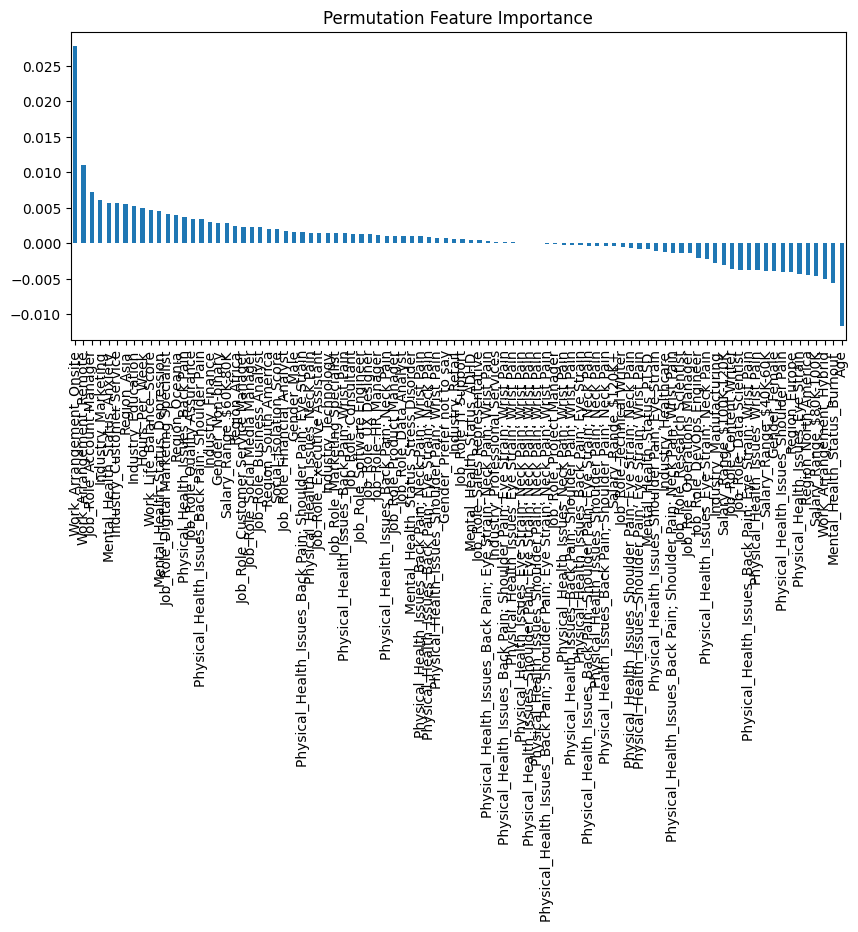

In [147]:
# --- Permutation Feature Importance (e.g., for XGBoost) ---

from sklearn.inspection import permutation_importance

# Use X_test and the already fitted XGBoost model 'xgb'
result = permutation_importance(xgb, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

importances = pd.Series(result.importances_mean, index=X_test.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Permutation Feature Importance')
plt.show()


In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Suppose you want to set threshold at 0.7
y_proba = logreg.predict_proba(X_test)[:,1]
y_pred_thresh = (y_proba > 0.7).astype(int)

# Encode y_test to match the type of y_pred_thresh
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

print(confusion_matrix(y_test_encoded, y_pred_thresh))

[[132  89]
 [216 195]]


Linear Regression MSE: 0.222
Linear Regression R²: 0.026


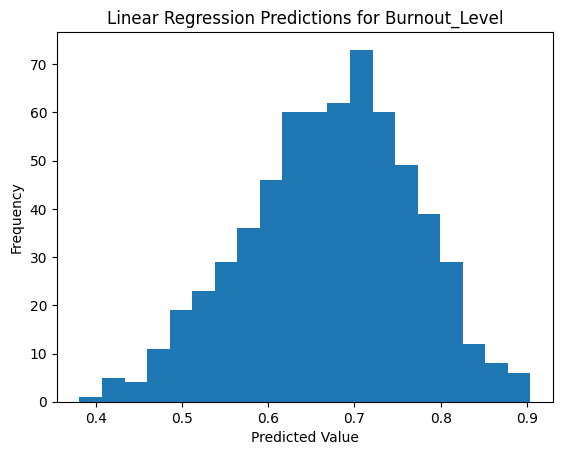

Top 10 Features (by absolute value):
Physical_Health_Issues_Shoulder Pain; Neck Pain               0.166707
Job_Role_HR Manager                                          -0.157945
Job_Role_Software Engineer                                   -0.142708
Job_Role_IT Support                                          -0.115432
Work_Arrangement_Remote                                      -0.097404
Job_Role_Marketing Specialist                                -0.093794
Job_Role_Product Manager                                     -0.092545
Work_Arrangement_Onsite                                       0.089164
Physical_Health_Issues_Back Pain; Shoulder Pain; Neck Pain   -0.084612
Job_Role_Project Manager                                     -0.083325
dtype: float64


In [151]:
# --- Linear Regression on Binary Target (Burnout_Level) ---

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare features and target
X = df_cleaned.drop('Burnout_Level', axis=1)
X = pd.get_dummies(X, drop_first=True)  # Ensure all categorical variables are numeric
y = df_cleaned['Burnout_Level']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Train/test split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model training
linreg = LinearRegression()
linreg.fit(X_train, y_train_encoded)

# Predictions
y_pred = linreg.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)

print(f"Linear Regression MSE: {mse:.3f}")
print(f"Linear Regression R²: {r2:.3f}")

# Optionally, see predicted values and distribution
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=20)
plt.title("Linear Regression Predictions for Burnout_Level")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()

# Show top features (absolute coefficients)
coef_df = pd.Series(linreg.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Top 10 Features (by absolute value):")
print(coef_df.head(10))